<a href="https://colab.research.google.com/github/Shambhurajdesai/Regression-project/blob/main/Retail__Sales__Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

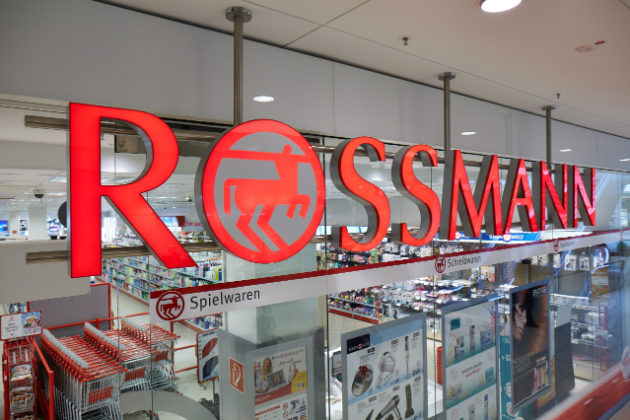

* GitHub link: 
https://github.com/MohanVishe/Supervised-ML--Regression----Retail-Sales-Prediction
* Google Drive: 
https://drive.google.com/drive/folders/1Ezu6B68vvjh922sTeKIhgeYLEX7v8OPT?usp=share_link
* Individual colab project: 
https://colab.research.google.com/drive/1W7VaAIH38Lp3mtXmT2yraBaejBWG_l67?usp=share_link
* Team colab project: 
https://colab.research.google.com/drive/18UNkvchbr4lSPJOBXoLaXMJB36jKPUs2?usp=share_link
* Technical Documentation:
https://docs.google.com/document/d/1nWPRBsGyckcRm1dqpv0THn_7Ux_Zv2s_/edit?usp=sharing&ouid=116777250676863176445&rtpof=true&sd=true
* Summary:
https://docs.google.com/document/d/1M1jjX3_Z-pzzSqW041aQOh8bP1NddUGw/edit?usp=sharing&ouid=116777250676863176445&rtpof=true&sd=true
* Presentation
https://drive.google.com/file/d/1gwx9ib7nPBrH9YxqtnYHSPBE3-I0cKfy/view?usp=sharing

# Project Title : <font color='red'>Predicting sales of a major store chain Rossmann</font>
# <font color='green'>Problem Description</font>



### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

### <font color='Green'>Business Problem</font>

Client interest and demand for product changes with time.  Which is important for growing business. Sales prediction is estimating the demand for a service or product for a particular time. This project contains real-world business problem 
of sales predicting with the help of machine learning models.

Our task is to predict sales and find important factors affecting demand to improve sales.

In [ ]:
# importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# loading Datasets
Rossmann_df = pd.read_csv('/content/drive/MyDrive/Projects/ Supervised ML Regression (Retail Sales Prediction)/Dataset /Rossmann Stores Data.csv')
store_df = pd.read_csv('/content/drive/MyDrive/Projects/ Supervised ML Regression (Retail Sales Prediction)/Dataset /store.csv') 

# DATA PRE PROCESSING

In [ ]:
# Now checking the shape of our DataFrames
Rossmann_df.shape,store_df.shape

((1017209, 9), (1115, 10))

The Rossmann_df has 1017209 number of rows and 9 columns.   
The Store_df has 1115 number of rows and 10 column.

In [ ]:
#checking the the datatypes of Rossmann_df by using info 
Rossmann_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
#checking the the datatypes of store_df by using info 
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


There 6 columns which have null values.

In [ ]:
#checking top 5 rows of Rossmann_df
Rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
#checking top 5 rows of store_df_df
store_df.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [ ]:
# checking the mean,mode and median in Rossman_df using describe function
Rossmann_df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00
mean,558.43,4.00,5773.82,633.15,0.83,0.38,0.18
std,321.91,2.00,3849.93,464.41,0.38,0.49,0.38
min,1.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,280.00,2.00,3727.00,405.00,1.00,0.00,0.00
50%,558.00,4.00,5744.00,609.00,1.00,0.00,0.00
75%,838.00,6.00,7856.00,837.00,1.00,1.00,0.00
max,1115.00,7.00,41551.00,7388.00,1.00,1.00,1.00


In [ ]:
#checking the mean, mode and median in store_df using describe function
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [ ]:
# checking duplicates in Rossmann Stores Data.csv
len(Rossmann_df[Rossmann_df.duplicated()])

0

In [ ]:
# checking duplicates in Store.csv
len(store_df[store_df.duplicated()])

0

## DATA CLEANING

In [ ]:
# Checking Null values in store_df
store_df.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

There are many Null values in columns -'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear, Promointerval', 'Promo2sinceWeek' and 'Promo2sinceYear'. Also CompetitionDistance has only 3 null values.

In [ ]:
# Replacing Null values in CompetitionDistance with median.
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

In [ ]:
# Replacing Null values with 0 in CompetitionOpenSinceMonth
store_df['CompetitionOpenSinceMonth'] = store_df['CompetitionOpenSinceMonth'].fillna(0)

# Replacing Null values with 0 in CompetitionOpenSinceYear
store_df['CompetitionOpenSinceYear'] = store_df['CompetitionOpenSinceYear'].fillna(0)

# Replacing Null values with 0 in Promo2SinceWeek
store_df['Promo2SinceWeek'] = store_df['Promo2SinceWeek'].fillna(0)

## Replacing Null values with 0 in Promo2SinceYear
store_df['Promo2SinceYear'] = store_df['Promo2SinceYear'].fillna(0)

## Replacing Null values with 0 in PromoInterval
store_df['PromoInterval'] =store_df['PromoInterval'].fillna(0)

## Now checking Null values
store_df.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

Now we have zero null vales in both datasets

# DATA WRANGLING

In [ ]:
# Store column is common in both the datasets
# Merging both datasets on store using pd.merge
df = pd.merge(Rossmann_df, store_df, on = 'Store', how ='left')

In [ ]:
# checking the shape 
df.shape

(1017209, 18)

Now we have 1017209 rows and 18 columns.

In [ ]:
#checking the datatype using info()
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

There are Five object datatype columns.
So we have to change the datatype object to int because our machine learning algorithms only takes numberical values.

In [ ]:
# first 'Date' object column
# Extracting year, month and day from "Date" using pd.to_datetime
# and Droping column 'Date
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].apply(lambda x: x.year)
df['Month'] = df['Date'].apply(lambda x: x.month)
df['Day'] = df['Date'].apply(lambda x: x.day)

# df.drop('Date',axis=1,inplace=True)

In [ ]:
# four object datatypes
object_columns = {'StateHoliday','StoreType','Assortment','PromoInterval'}

In [ ]:
# Checking unique values in object columns
for i in list(object_columns-{"Store"}):
  print('\033[91m' , i , '\033[0m')
  print(df[i].unique())

 Assortment 
['a' 'c' 'b']
 StateHoliday 
['0' 'a' 'b' 'c' 0]
 PromoInterval 
[0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
 StoreType 
['c' 'a' 'd' 'b']


In [ ]:
# Changing Assortment, StoreType and PromoInterval Datatypes ti int
df['Assortment'] = df['Assortment'].map({'a':0, 'c':1,'b':2})
df['Assortment'] = df['Assortment'].astype(int, copy=False)

df['StoreType'] = df['StoreType'].map({'a':1,'b':2,'c':3,'d':4})
df['StoreType'] = df['StoreType'].astype(int, copy=False)

df['PromoInterval'] = df['PromoInterval'].map({0: 0,'Jan,Apr,Jul,Oct': 1,'Feb,May,Aug,Nov': 2,'Mar,Jun,Sept,Dec': 3})
df['PromoInterval'] = df['PromoInterval'].astype(int, copy=False)


In [ ]:
# Checking Datatypes using info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int64         
 10  Assortment                 1017209 non-null  int64         
 11  CompetitionDistance        1017209 no

In [ ]:
# checking value counts using value_counts() funtion
df['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [ ]:
# Replacing all 0
df['StateHoliday'] = df['StateHoliday'].replace("0",0)

In [ ]:
df['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [ ]:
# Encoding Stateholiday
df = pd.get_dummies(df, columns=["StateHoliday"],drop_first=True)

In [ ]:
# checking top 5 rows
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StoreType,Assortment,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,2015-07-31,5263,555,1,1,1,3,0,...,0,0.0,0.0,0,2015,7,31,0,0,0
1,2,5,2015-07-31,6064,625,1,1,1,1,0,...,1,13.0,2010.0,1,2015,7,31,0,0,0
2,3,5,2015-07-31,8314,821,1,1,1,1,0,...,1,14.0,2011.0,1,2015,7,31,0,0,0
3,4,5,2015-07-31,13995,1498,1,1,1,3,1,...,0,0.0,0.0,0,2015,7,31,0,0,0
4,5,5,2015-07-31,4822,559,1,1,1,1,0,...,0,0.0,0.0,0,2015,7,31,0,0,0


# EDA - Exploratory Data Analysis

* With the help of exploratory data analysis we will find the trends and patterns in the data and make our conclusion
* We will use matplotlib,Seaborn for visualization and pandas to explore data




# `Hypothesis`

1. Promotion will leads to increse in sales
2. Weekend the sales would be low as stores will be closed
3. Holidays will leads to decrese in sales
4. The number of customers will positively correlated with sales
5. Sales will be zero when stores are closed


## **Features Unique Values**

In [ ]:
# '\033[91m' for colour red and'\033[0m' to end colour
# (https://www.studytonight.com/python-howtos/how-to-print-colored-text-in-python)

for i in list(set(df.columns)-{"Store","Date","CompetitionDistance","Sales","Customers"}):
  print('\033[91m' , i , '\033[0m')
  print(df[i].unique())

 StateHoliday_a 
[0 1]
 CompetitionOpenSinceMonth 
[ 9. 11. 12.  4. 10.  8.  0.  3.  6.  5.  1.  2.  7.]
 StateHoliday_b 
[0 1]
 DayOfWeek 
[5 4 3 2 1 7 6]
 Assortment 
[0 1 2]
 SchoolHoliday 
[1 0]
 Month 
[ 7  6  5  4  3  2  1 12 11 10  9  8]
 Promo2SinceWeek 
[ 0. 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
 Promo2SinceYear 
[   0. 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
 Year 
[2015 2014 2013]
 Promo 
[1 0]
 Promo2 
[0 1]
 StoreType 
[3 1 4 2]
 CompetitionOpenSinceYear 
[2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.    0. 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
 Day 
[31 30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8
  7  6  5  4  3  2  1]
 Open 
[1 0]
 StateHoliday_c 
[0 1]
 PromoInterval 
[0 1 2 3]


## Value Count (Categorical Features)

0    537445
1    471470
2      8294
Name: Assortment, dtype: int64


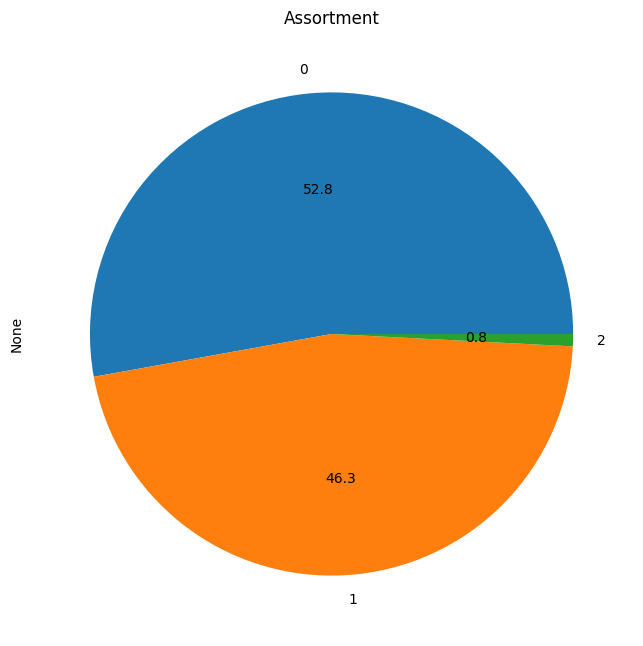

 =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 
2013    406974
2014    373855
2015    236380
Name: Year, dtype: int64


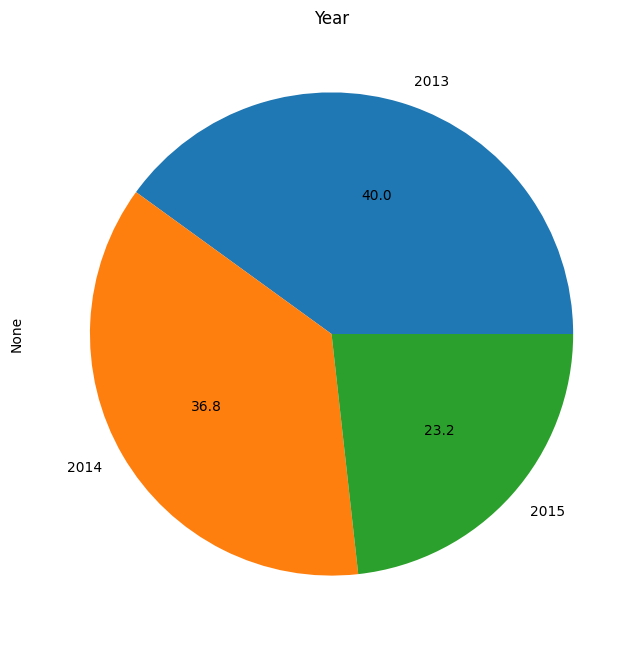

 =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 
0    835488
1    181721
Name: SchoolHoliday, dtype: int64


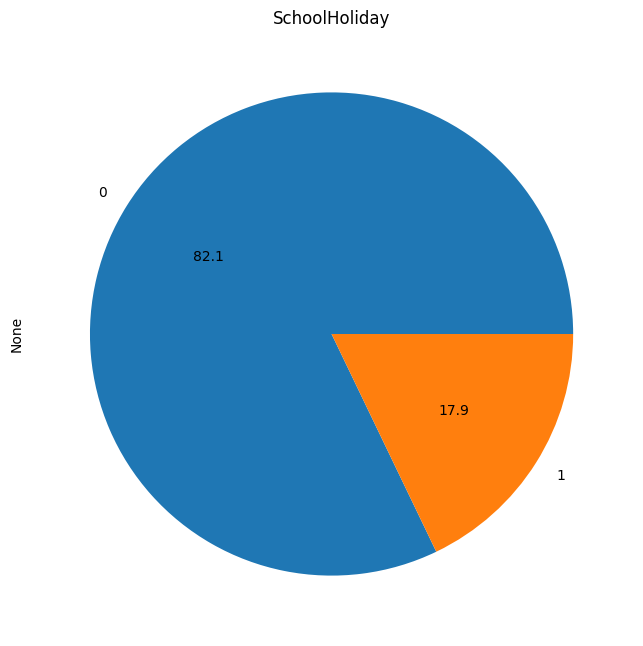

 =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 
0    629129
1    388080
Name: Promo, dtype: int64


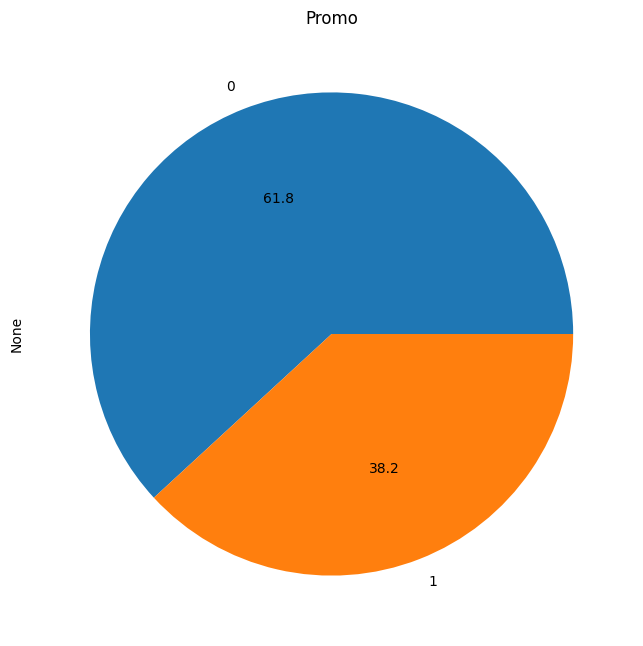

 =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 
1    509178
0    508031
Name: Promo2, dtype: int64


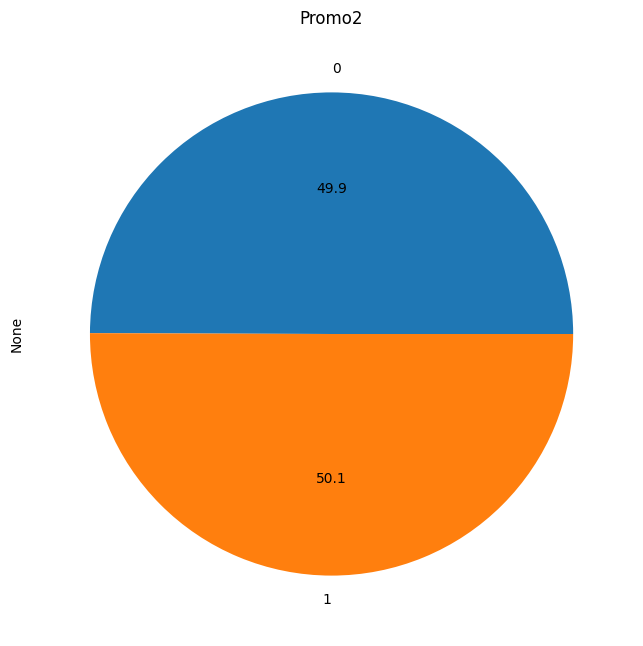

 =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 
1    844392
0    172817
Name: Open, dtype: int64


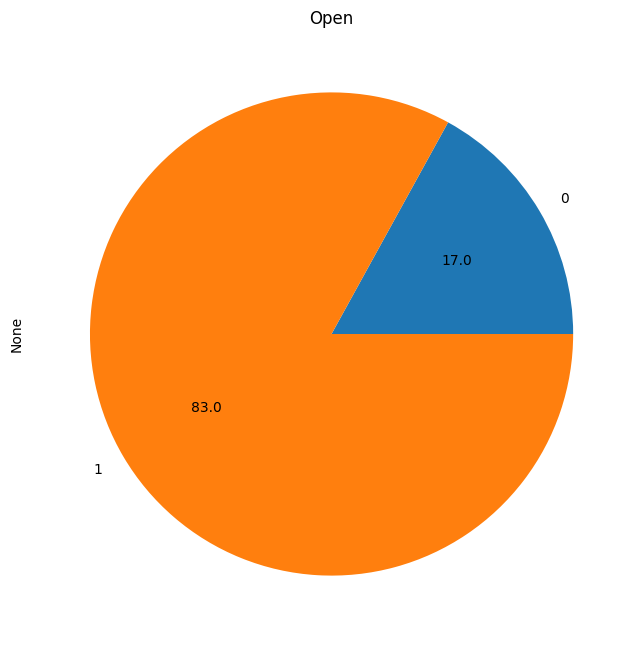

 =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 


In [ ]:
for i in set(df.columns)-{"StateHoliday_b","StateHoliday_a","StateHoliday_c"}:

  #cant visualize large number of categories
  if len(df[i].unique()) > 3:
    continue
  plt.rcParams.update({'figure.figsize':(8,8),'figure.dpi':100}) 
  df.groupby(i).size().plot(kind='pie',autopct='%.1f')
  print(df[i].value_counts())
  plt.title(i)
  
  plt.show()
  print("\033[91m = \033[0m" * 30)


### <font color='orange'>Insights</font>
---
* 38.2 % data has `promo`tion involved 
* 54.2% data is of `store type` "a" 
* 17% data is of closed stores 
* Data contain 2013 values arount 40%

### Multivariated Analysis

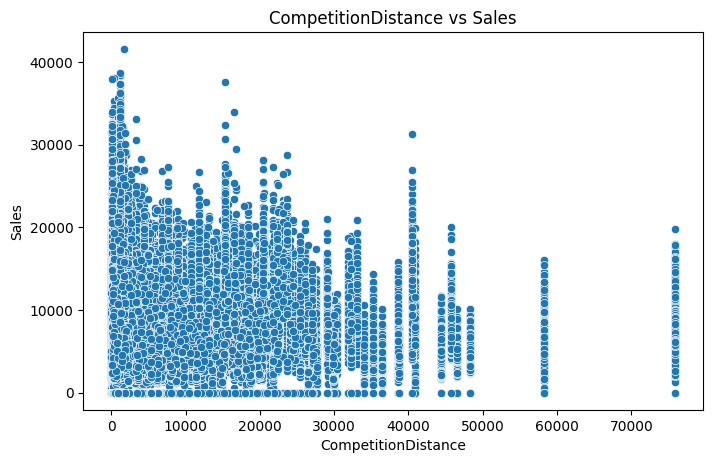

In [ ]:
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100}) 
sns.scatterplot(data=df,x="CompetitionDistance",y="Sales")
plt.title("CompetitionDistance vs Sales")
plt.show() 

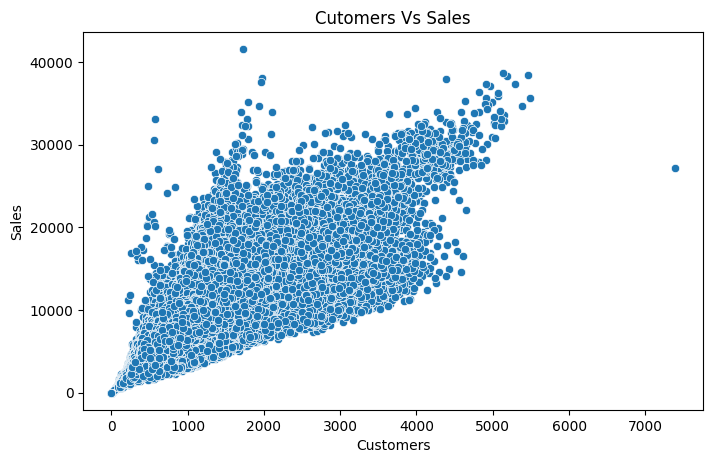

In [ ]:
sns.scatterplot(data=df,x="Customers",y="Sales")
plt.title("Cutomers Vs Sales")
plt.show() 

### <font color='orange'>Insights</font>
* The competitor stores are closed to each other has more sales 
* We can see that `sales` are positively correlated with `customers `



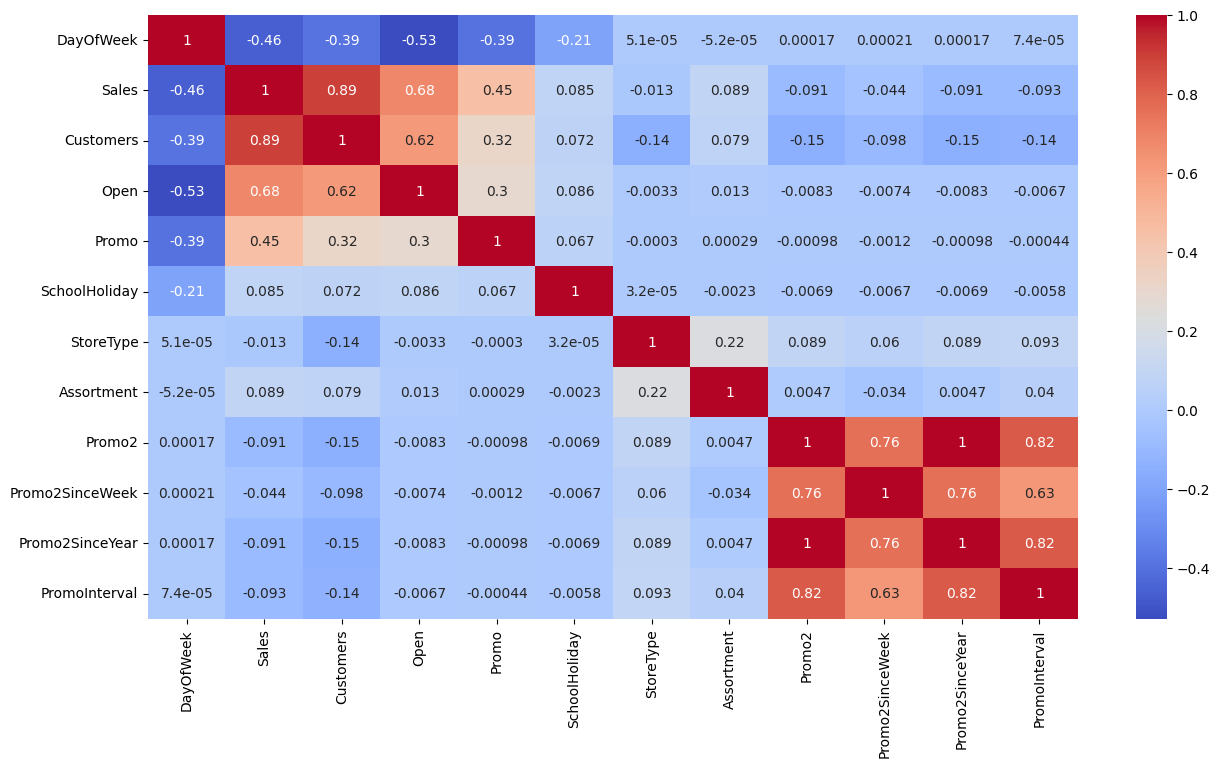

In [ ]:
plt.figure(figsize=(15, 8))
df_corr = df[['DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
'SchoolHoliday', 'StoreType', 'Assortment', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']].corr()
sns.heatmap(df_corr,annot=True,cmap='coolwarm')


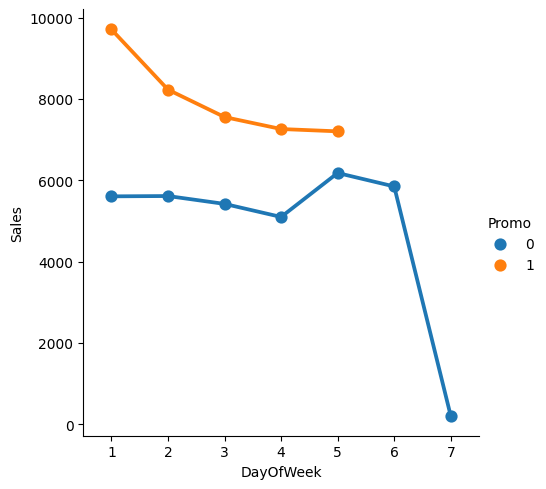

In [ ]:
# As We can see that when the promo is running Sales are high.
sns.factorplot(data = df, x = "DayOfWeek", y = "Sales", hue = "Promo")

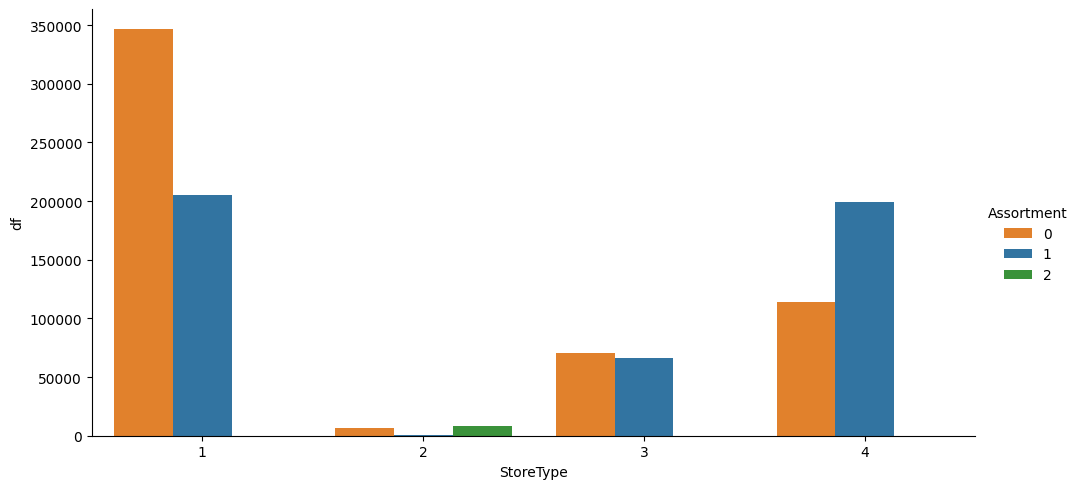

In [ ]:
sns.axes_style('whitegrid')
sns.catplot('StoreType',data=df,aspect=2,kind='count',hue='Assortment',
            palette=['C1', 'C0','C2']).set_ylabels('df')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

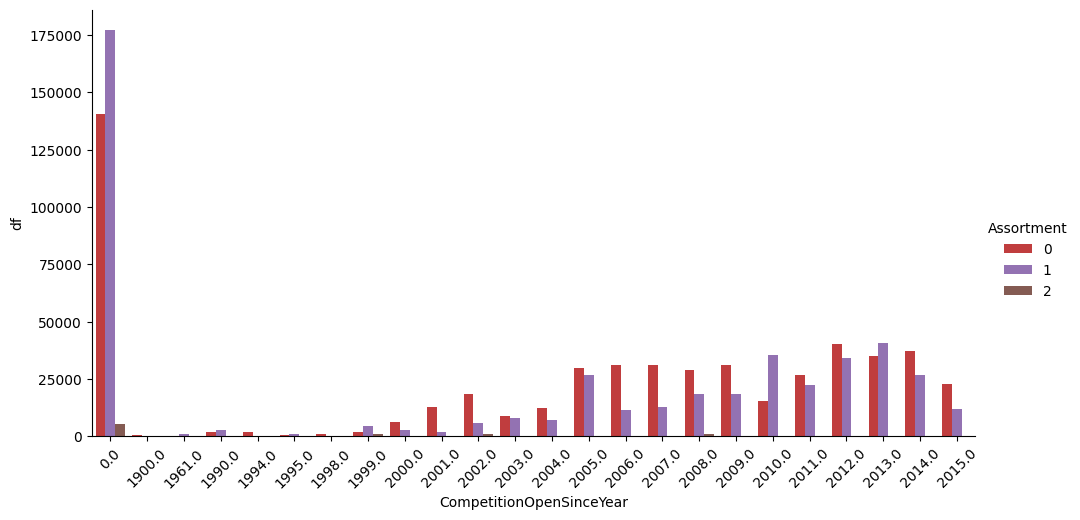

In [ ]:
sns.axes_style('whitegrid')
sns.catplot('CompetitionOpenSinceYear',data=df,aspect=2,kind='count',hue='Assortment',
            palette=['C3', 'C4','C5']).set_ylabels('df')
plt.xticks(rotation=45)

2.933464608539128

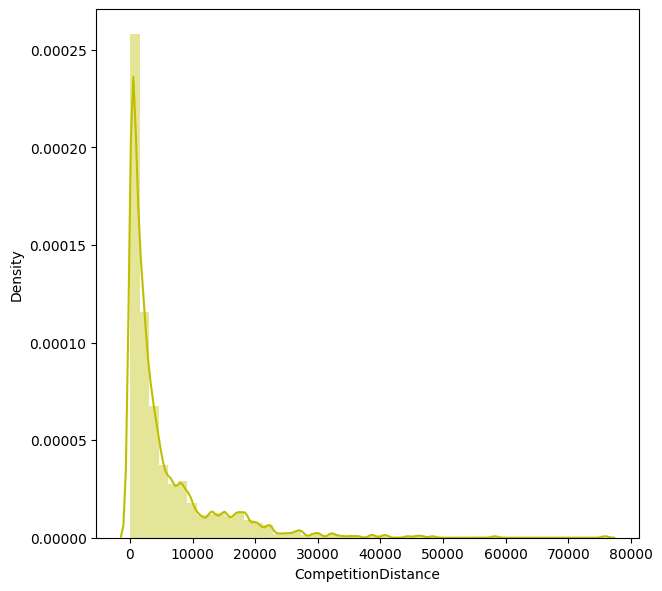

In [ ]:
fig = plt.figure(figsize=(7,7))
ax=fig.gca()
sns.distplot(df['CompetitionDistance'],color='y')

df['CompetitionDistance'].skew()

-0.3595281109099961

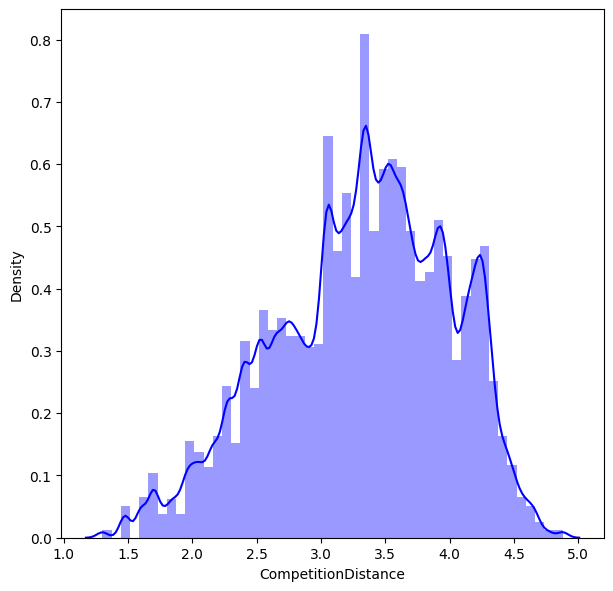

In [ ]:
fig = plt.figure(figsize=(7,7))
ax=fig.gca()
sns.distplot(np.log10(df['CompetitionDistance']),color='b')

np.log10(df['CompetitionDistance']).skew()

0.18917420709960237

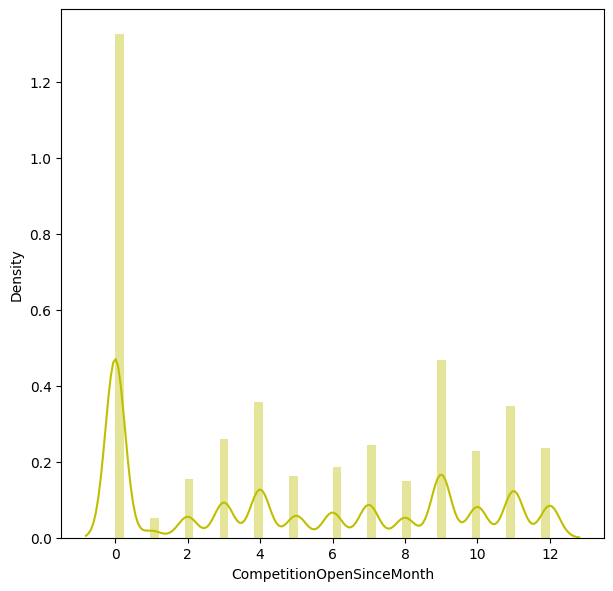

In [ ]:
fig = plt.figure(figsize=(7,7))
ax=fig.gca()
sns.distplot(df['CompetitionOpenSinceMonth'],color='y')

df['CompetitionOpenSinceMonth'].skew()

-0.7821380894877848

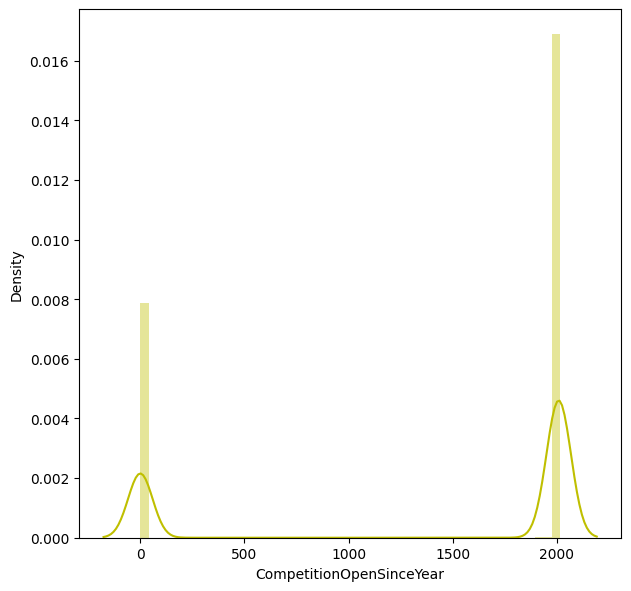

In [ ]:
fig = plt.figure(figsize=(7,7))
ax=fig.gca()
sns.distplot(df['CompetitionOpenSinceYear'],color='y')

df['CompetitionOpenSinceYear'].skew()

1.0033904980115238

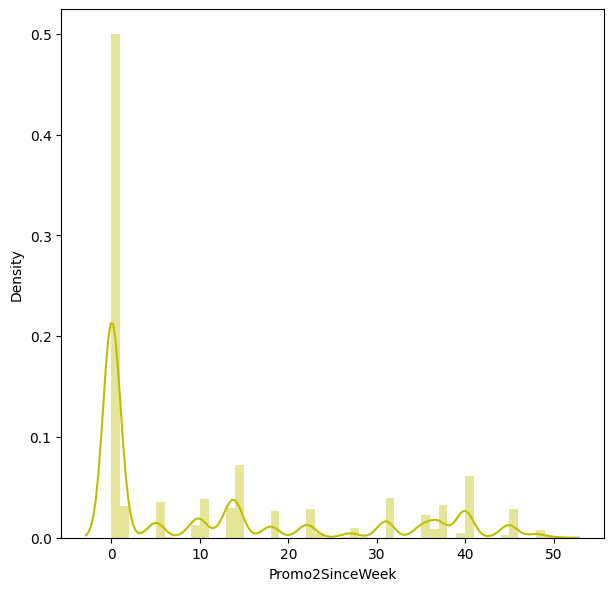

In [ ]:
fig = plt.figure(figsize=(7,7))
ax = fig.gca()
sns.distplot(df['Promo2SinceWeek'],color ='y')

df['Promo2SinceWeek'].skew()

-0.0022510914524836306

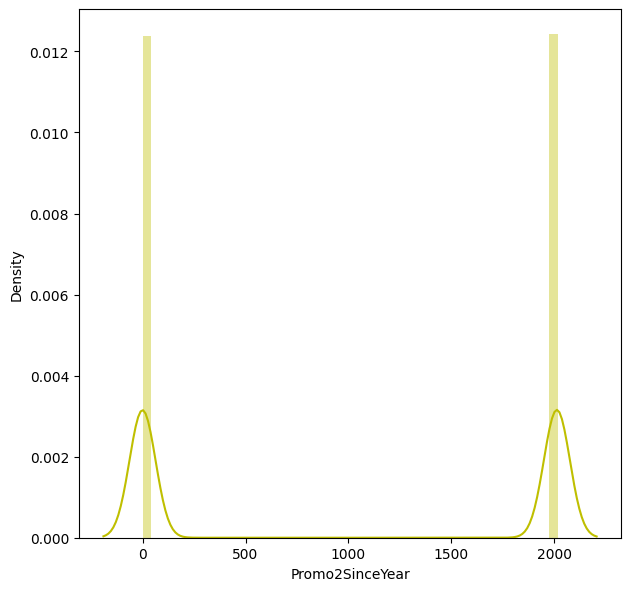

In [ ]:
fig = plt.figure(figsize=(7,7))
ax = fig.gca()
sns.distplot(df['Promo2SinceYear'],color ='y')

df['Promo2SinceYear'].skew()

Text(0.5, 1.0, 'Assortment')

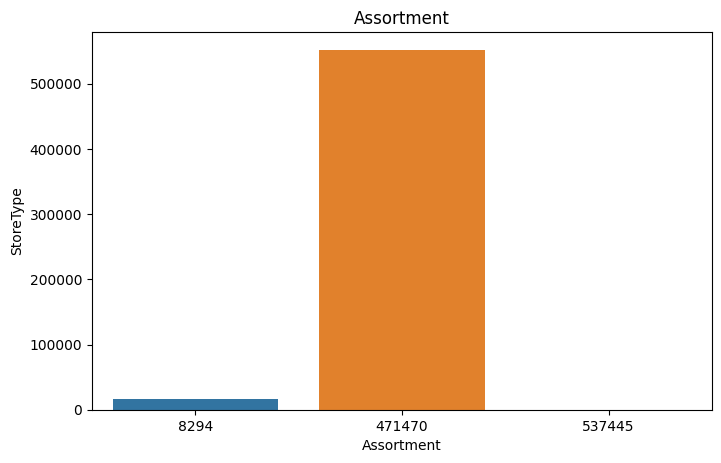

In [ ]:
sns.barplot(df['Assortment'].value_counts(),df['StoreType'].value_counts())
plt.title('Assortment')

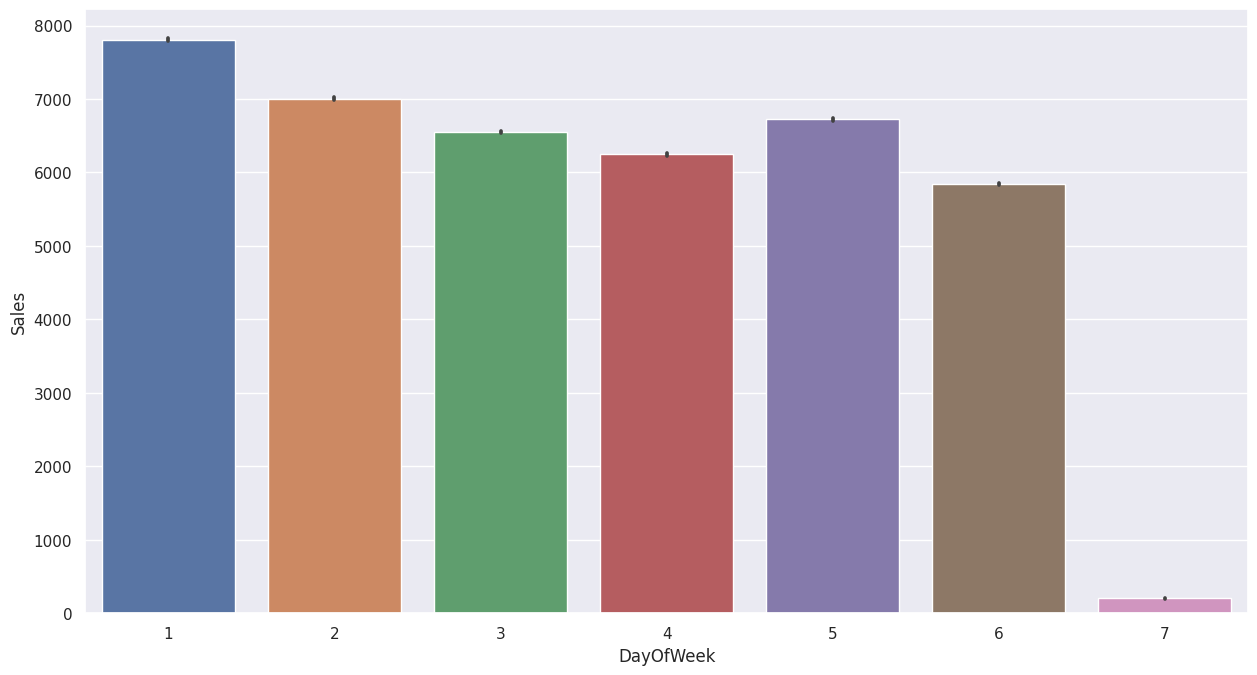

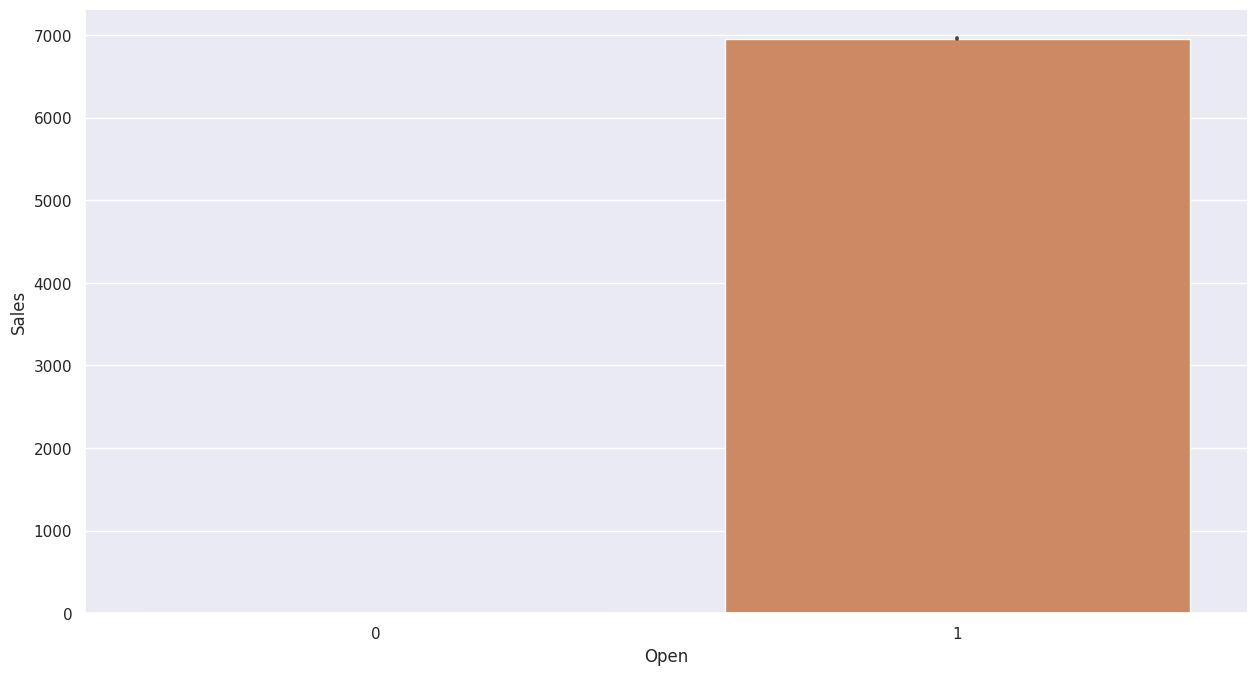

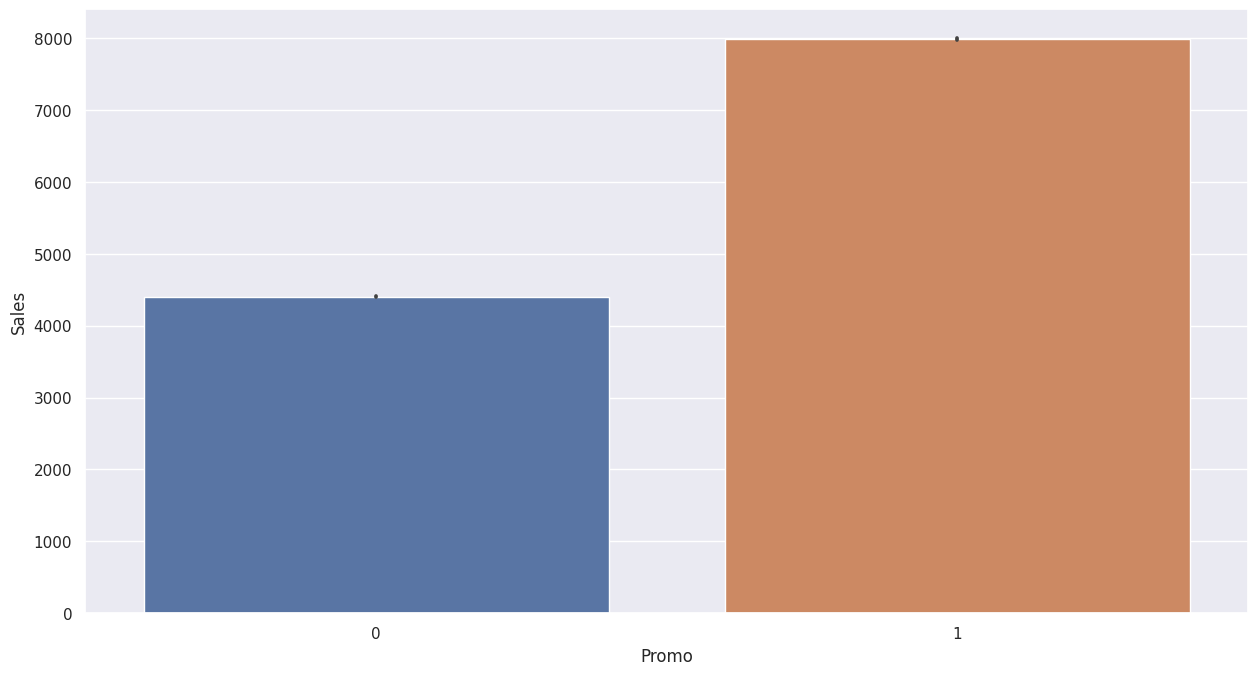

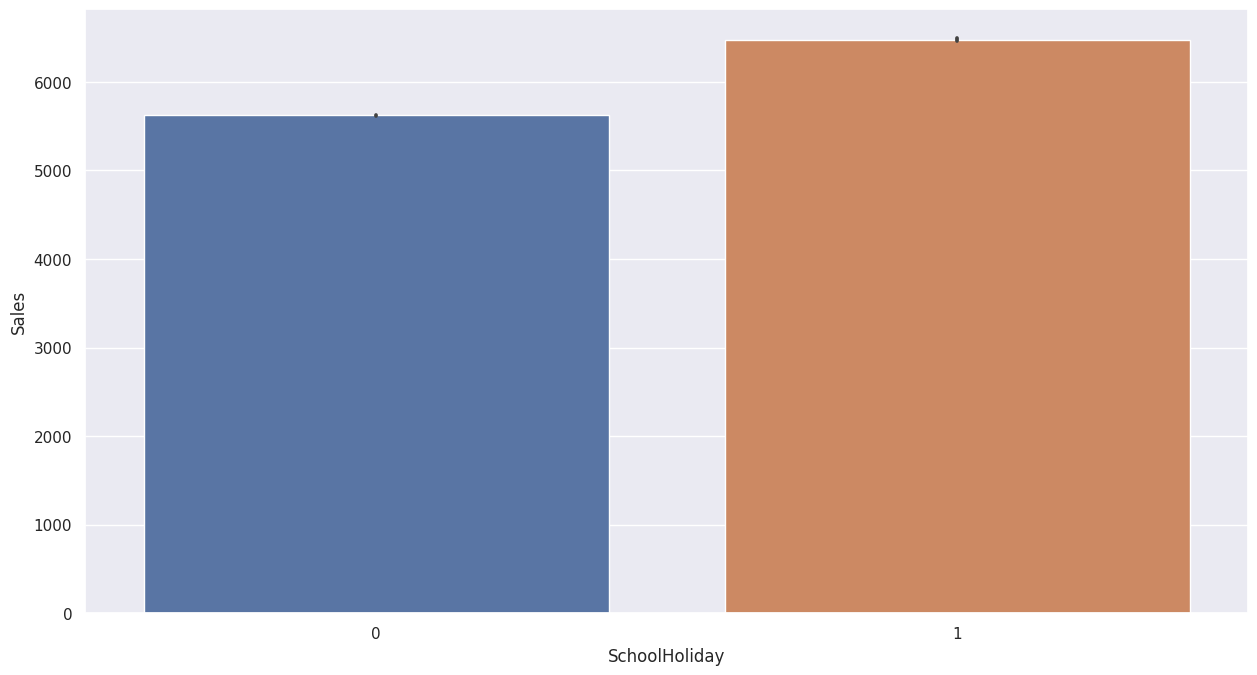

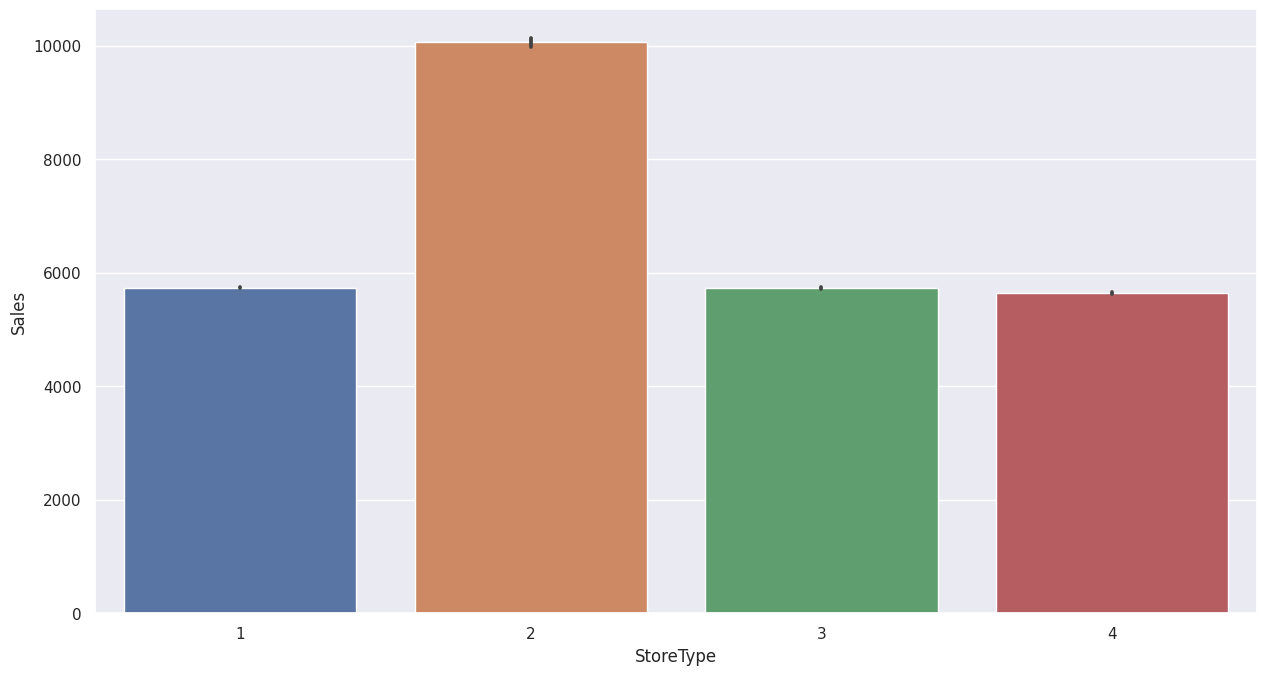

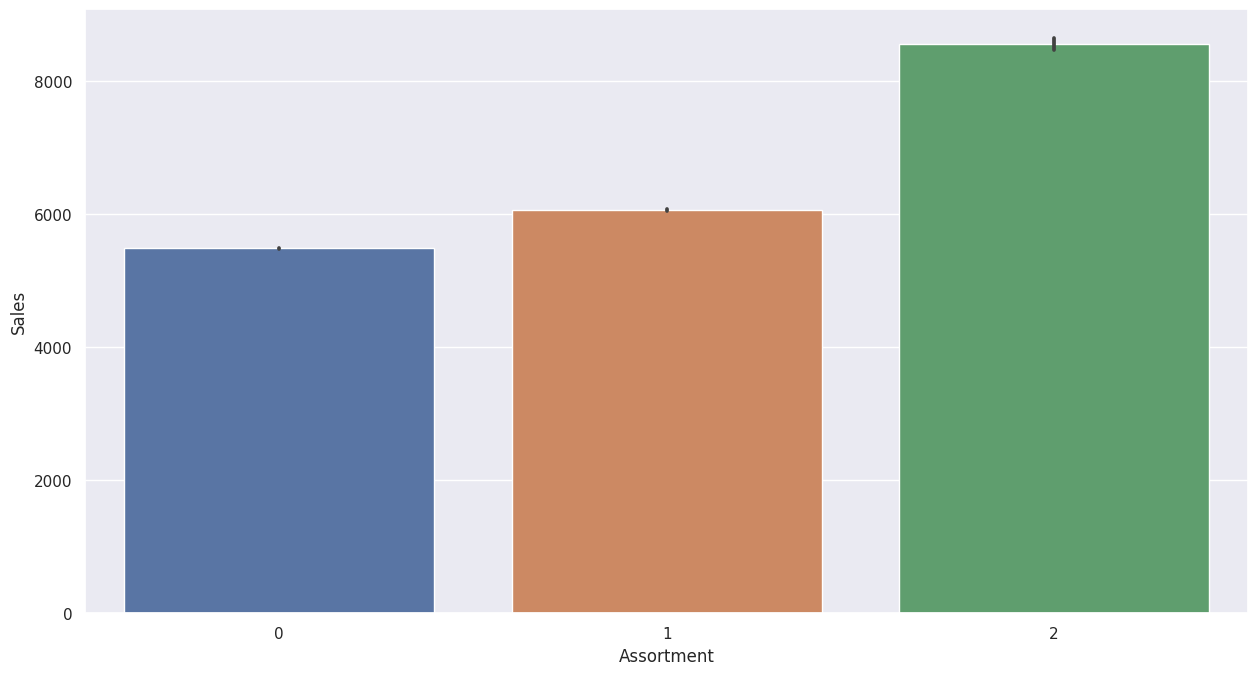

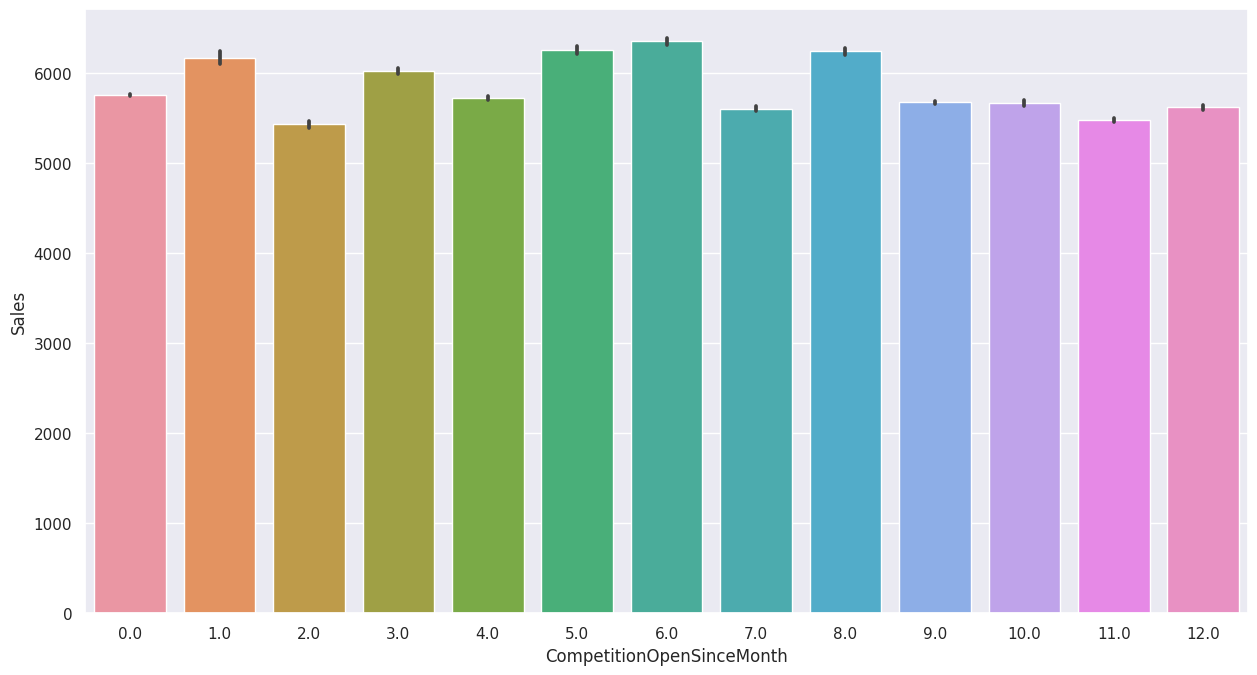

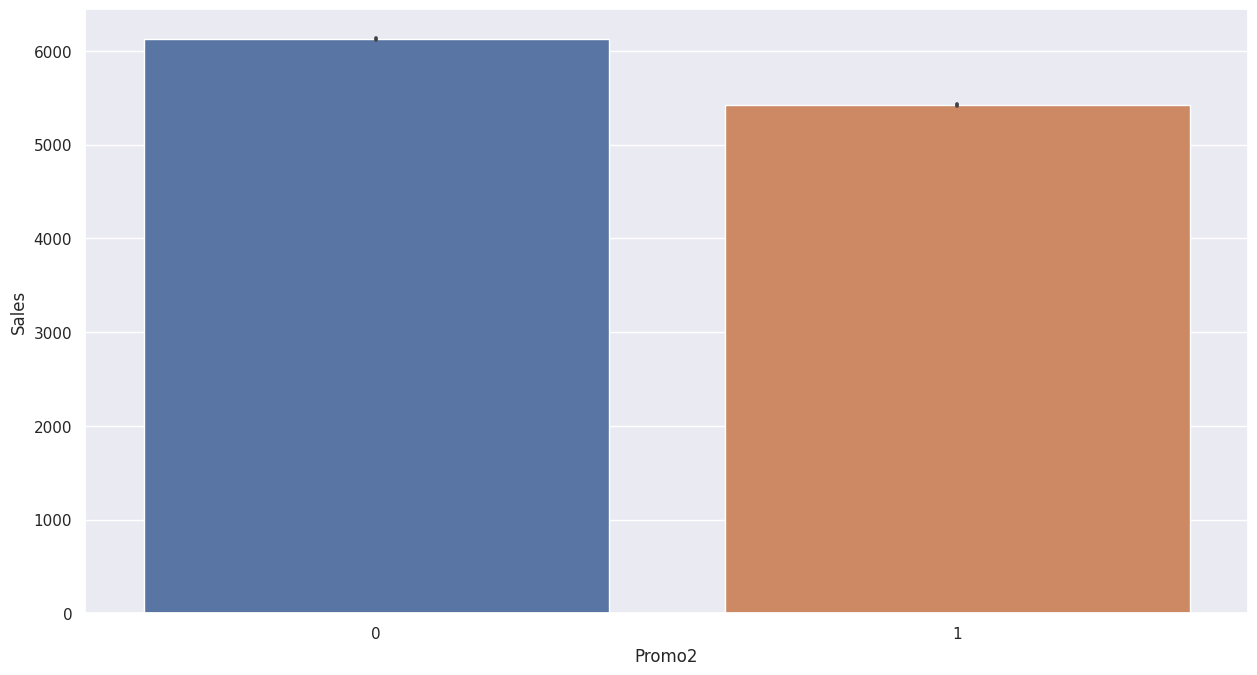

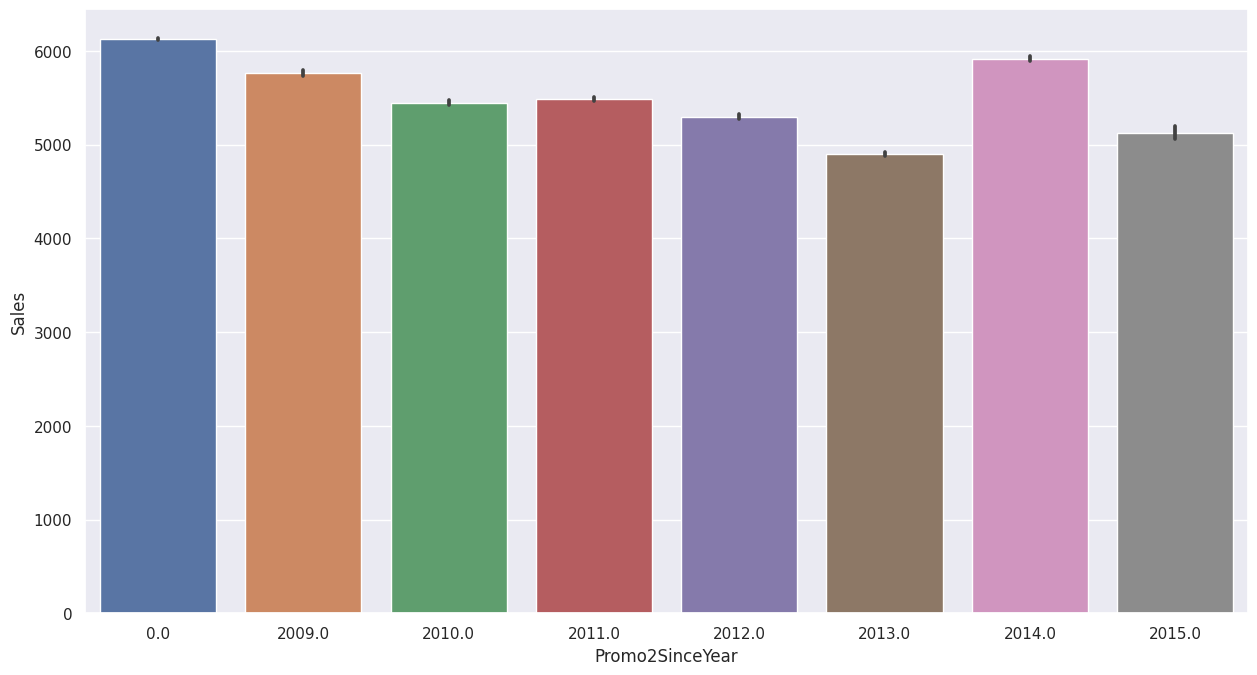

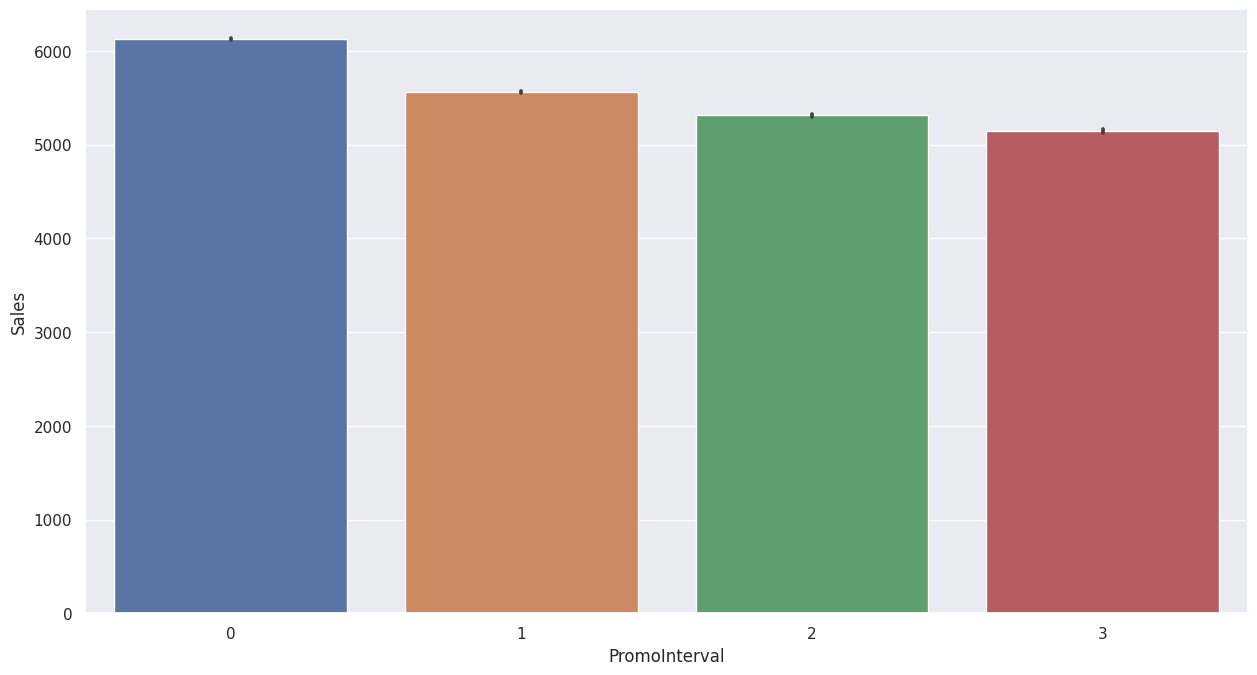

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
categorical_variables = ['DayOfWeek','Open','Promo','SchoolHoliday','StoreType','Assortment',
                         'CompetitionOpenSinceMonth','Promo2','Promo2SinceYear','PromoInterval']
for value in categorical_variables:
  ax = sns.barplot(x=df[value], y=df['Sales'])
  plt.show()   

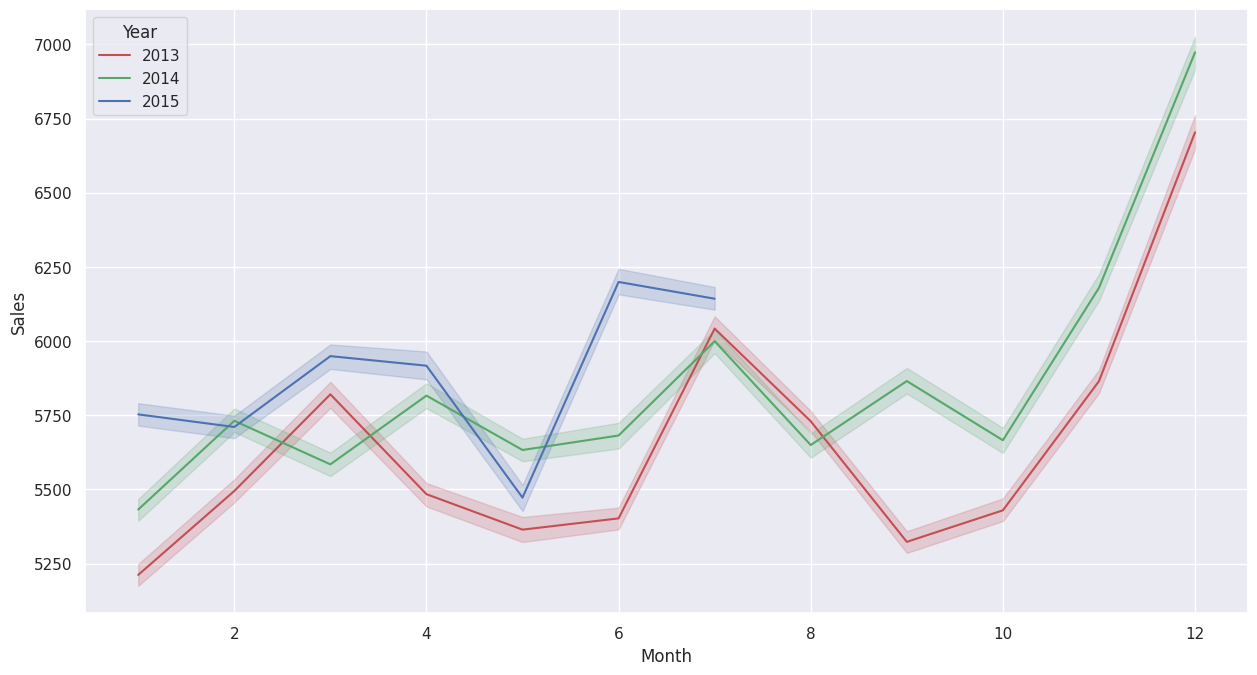

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data = df,x ='Month', y='Sales', hue='Year',palette=['r', 'g', 'b'])
plt.show()

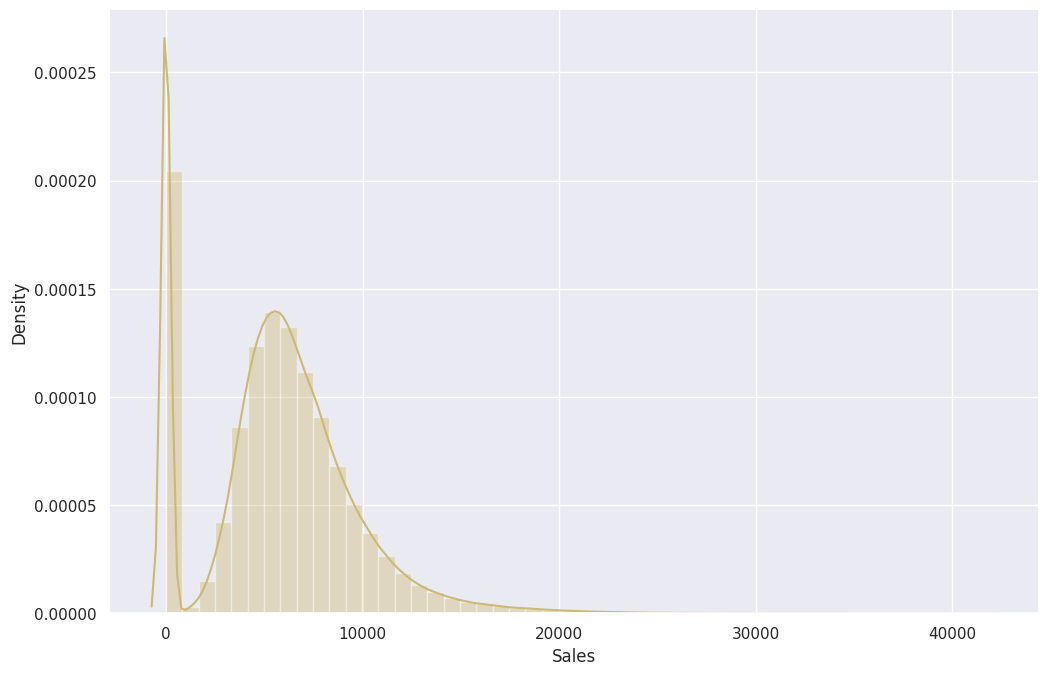

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(df['Sales'],color="y")

In [ ]:
dfcount = (df['Sales'] < 20000).value_counts()
dfcount

True     1013109
False       4100
Name: Sales, dtype: int64

In [ ]:
logsales = np.log10(df['Sales'])


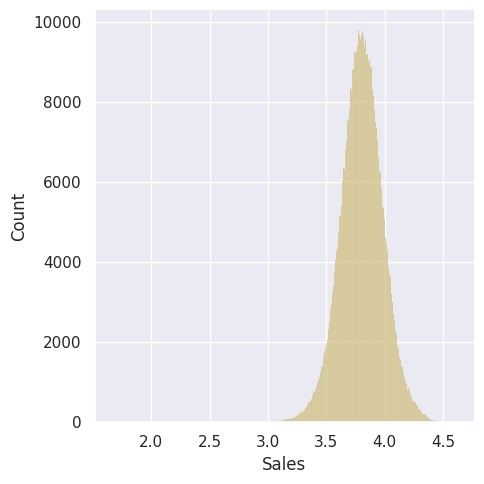

In [ ]:
sns.displot(logsales,color="y")

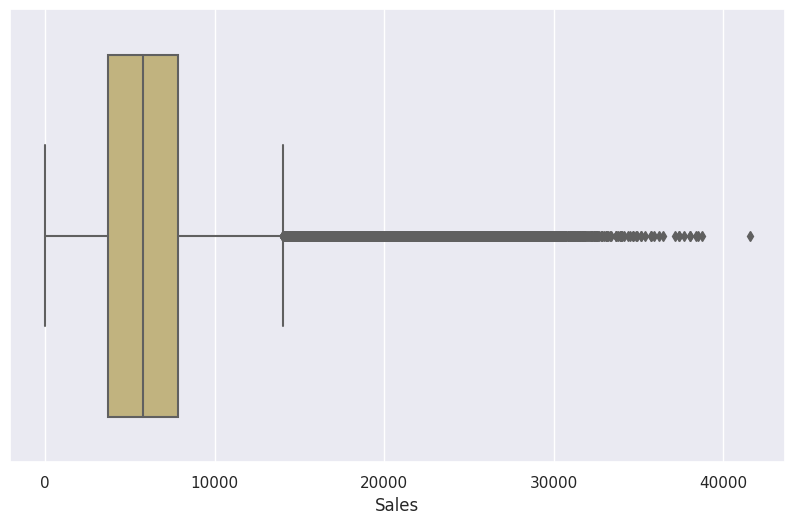

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(df['Sales'],color="y")

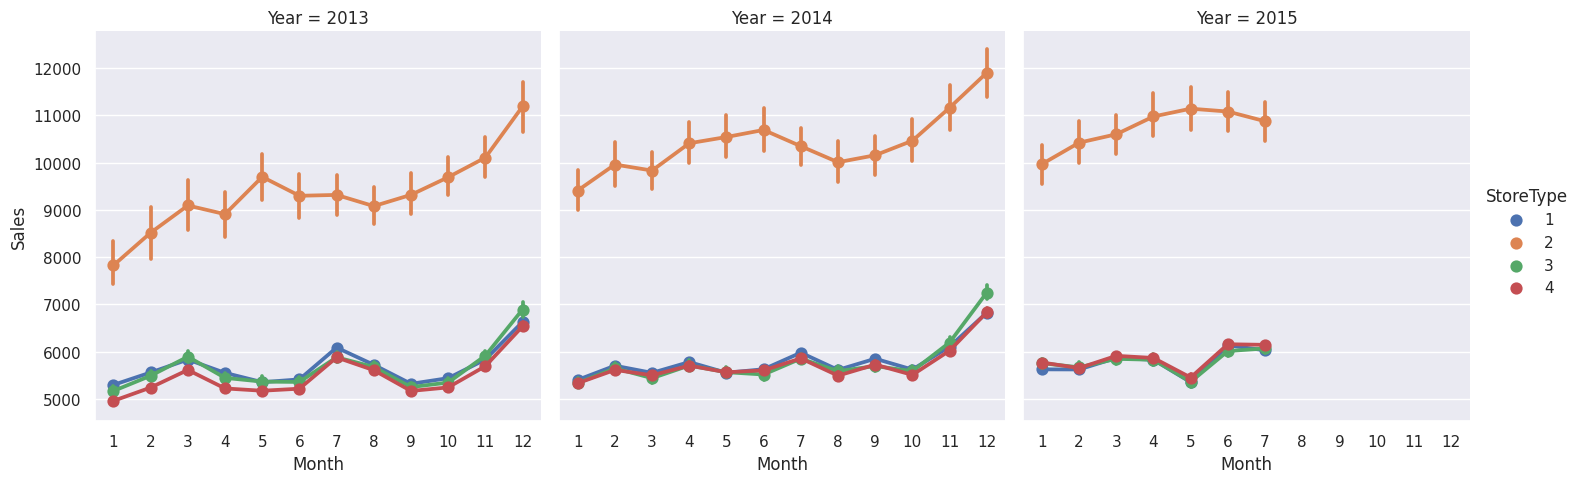

In [ ]:
sns.factorplot(data = df, x = "Month", y = "Sales", col = "Year", hue = "StoreType")

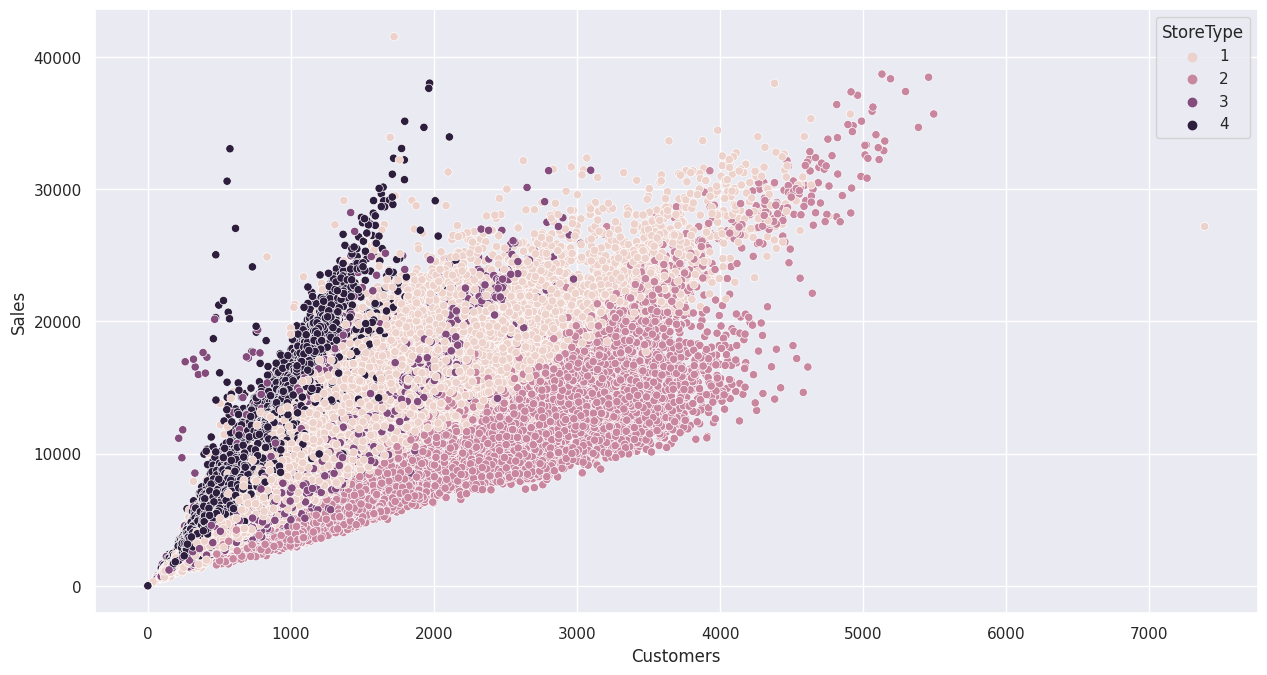

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df,x='Customers',y='Sales',hue='StoreType')
plt.show()

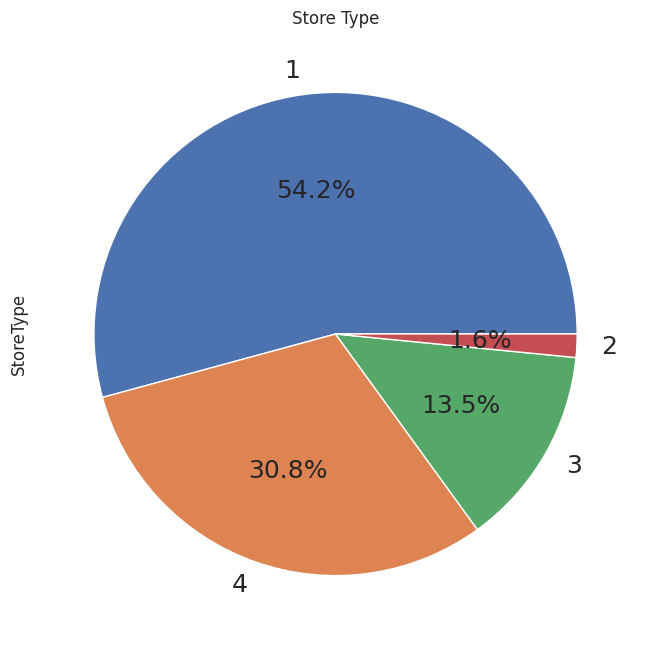

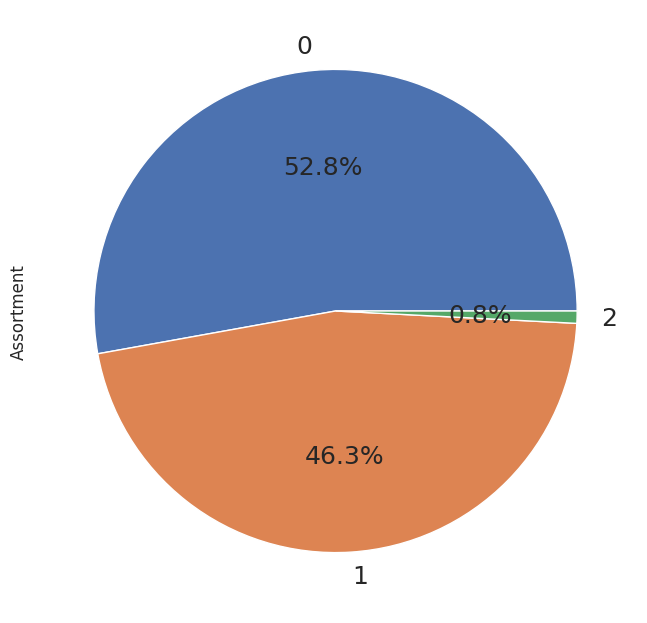

In [ ]:
percent = df["StoreType"].value_counts()
percent.plot.pie(fontsize= 18,autopct="%.1f%%",figsize=(10,8),textprops={'fontsize': 20})
plt.title('Store Type')
plt.show()

percent = df["Assortment"].value_counts()
percent.plot.pie(fontsize= 18,autopct="%.1f%%",figsize=(10,8),textprops={'fontsize': 20})
plt.show()

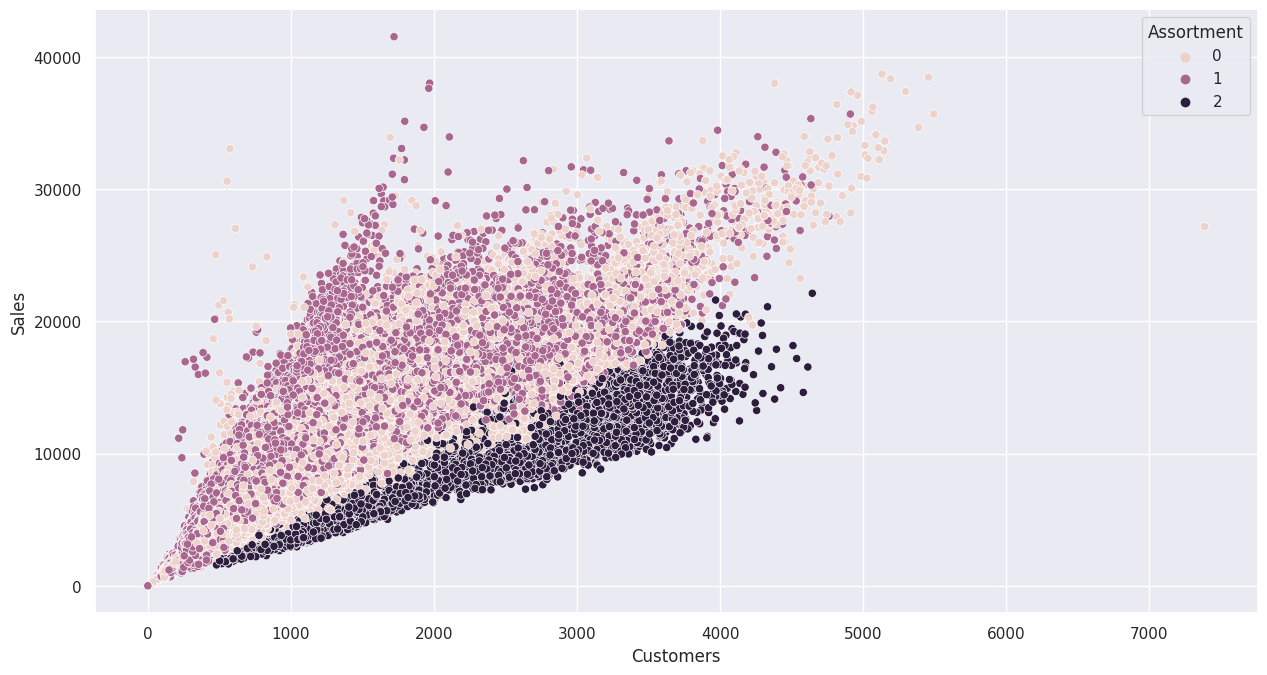

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df,x='Customers',y='Sales',hue='Assortment')
plt.show()

Text(0.5, 1.0, 'Boxplot For Sales Values on the basis of Assortment Level')

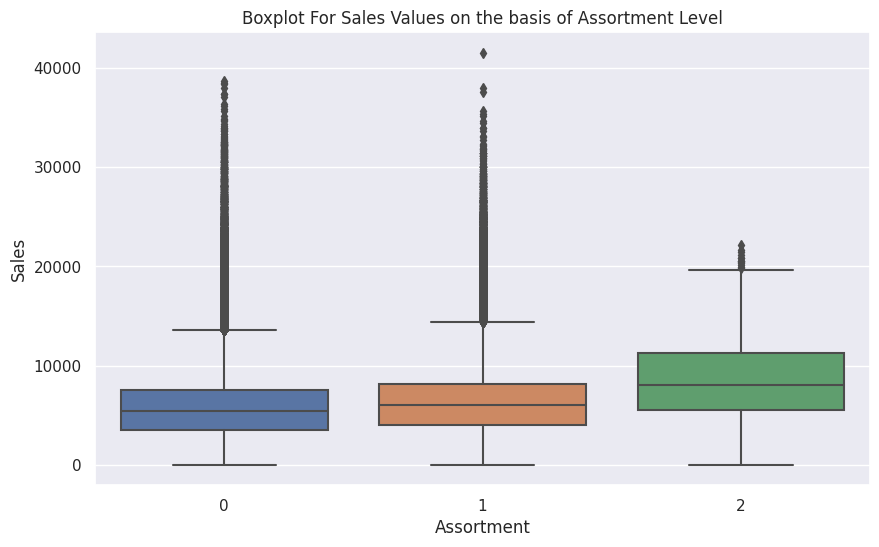

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Assortment", y="Sales", data=df)
plt.title('Boxplot For Sales Values on the basis of Assortment Level')

Text(0.5, 1.0, 'Boxplot For Sales Values')

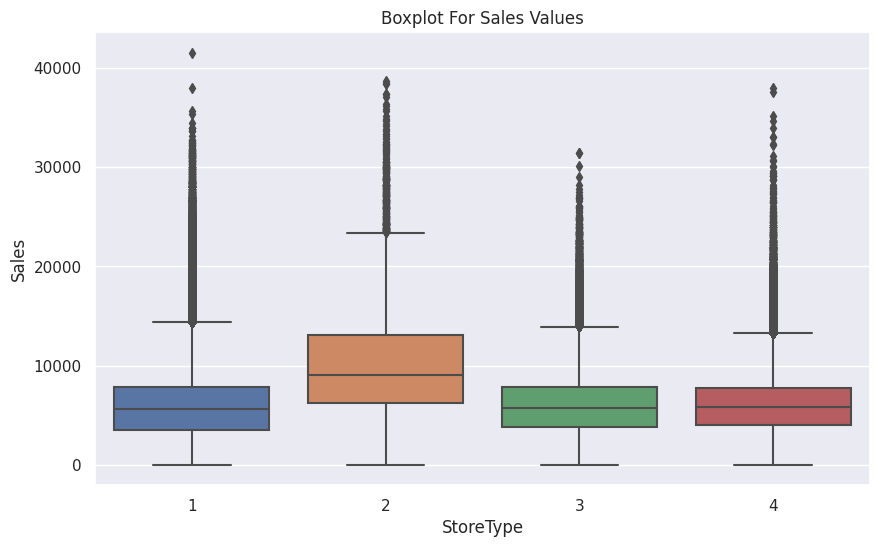

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="StoreType", y="Sales", data=df)
plt.title('Boxplot For Sales Values')

# Modeling

### factors affecting choosing the Algorithm
1. There are various factors such as time complexity, categorical features , numerical features , data ,outliers, noise which decide the best model to be used.
2. As there are many categorical features so the decision tree could work better in such case
3. decision Tree is highly interpretable which will helpful for feature importance
4. Here we go  with decision tree along with linear regression models to understand which will work better.

# Multicollinearity

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Sales','Open']]])

,variables,VIF
0,Store,4.028489e+00
1,DayOfWeek,6.924223e+00
2,Customers,4.144348e+00
3,Promo,2.025789e+00
4,SchoolHoliday,1.345254e+00
5,StoreType,3.976494e+00
6,Assortment,2.084650e+00
7,CompetitionDistance,1.606575e+00
8,CompetitionOpenSinceMonth,6.135728e+00
9,CompetitionOpenSinceYear,8.414835e+00


# 1.Train-Test Split (Random Split)

In [ ]:
dfr=df.copy()

In [ ]:
dfr.drop('Date',axis=1,inplace=True)

In [ ]:
# check 
dfr.head(2)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,5263,555,1,1,1,3,0,1270.0,...,0,0.0,0.0,0,2015,7,31,0,0,0
1,2,5,6064,625,1,1,1,1,0,570.0,...,1,13.0,2010.0,1,2015,7,31,0,0,0


In [ ]:
# Create the data of independent variables
dependent_variable = 'Sales'
# Create a list of independent variables

X = dfr.drop('Sales',axis=1,inplace=False)

# Create the dependent variable data
y = dfr[dependent_variable].values

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## LINEAR REGRESSION

In [ ]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Checking the score on train set.
regressor.score(X_train, y_train)

0.8671292373770988

In [ ]:
#checking the coefficeint
regressor.coef_

array([-1.36734153e+02, -4.54103483e+02,  4.67227172e+04,  1.30599377e+03,
        1.24705486e+03,  4.43410278e+01,  7.51946625e+02,  7.79310374e+01,
        2.03755460e+03, -2.65371609e+01,  1.25116889e+02,  8.36212276e+04,
        4.19986758e+02, -8.35622865e+04, -3.39488436e+02,  2.95005826e+02,
        3.79493430e+02,  2.31038431e+01, -7.72420721e+02, -9.68595805e+02,
       -4.48516624e+02])

In [ ]:
#check the intercept
regressor.intercept_

-424.82127889008734

In [ ]:
# Predicting the Test set results
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

In [ ]:
from numpy import math
math.sqrt(mean_squared_error(y_test, y_pred_test))

1397.1686790432698

In [ ]:
# Checking the Performance on train set
r2_train= r2_score(y_train, y_pred_train)
print(r2_train)

0.8671292373770988


In [ ]:
# Checking the Performance on test set
r2_test= r2_score(y_test, y_pred_test)
print(r2_test)

0.8678950301855766


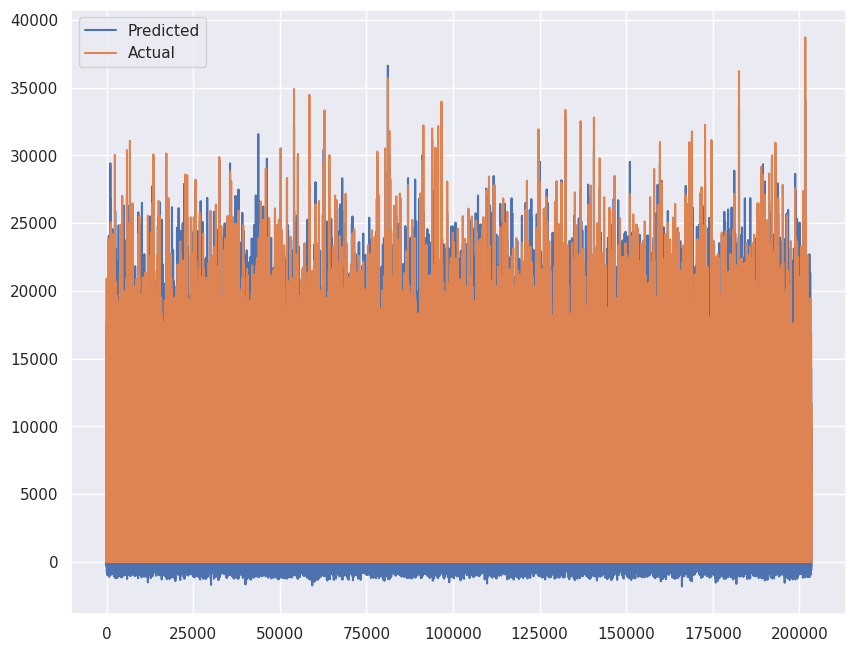

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

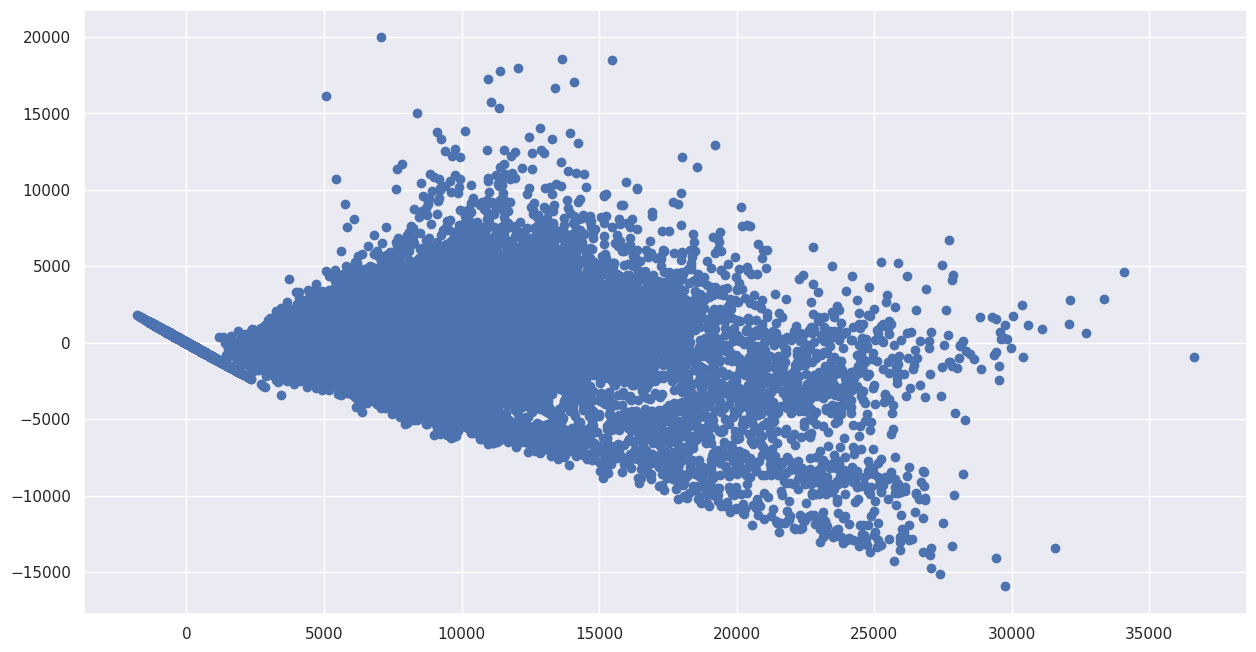

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))
plt.show()

## LASSO REGRESSION

In [ ]:
# Createing an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.0001, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.8677020697598614 0.8669841539238581


In [ ]:
# Predicting the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [ ]:
# Checking the Performance on train set
r2_train_lasso= r2_score(y_train, y_pred_train_lasso)
print(r2_train_lasso)

0.8669841539238581


In [ ]:
# Checking the Performance on test set
r2_test_lasso= r2_score(y_test, y_pred_test_lasso)
print(r2_test_lasso)

0.8677020697598614


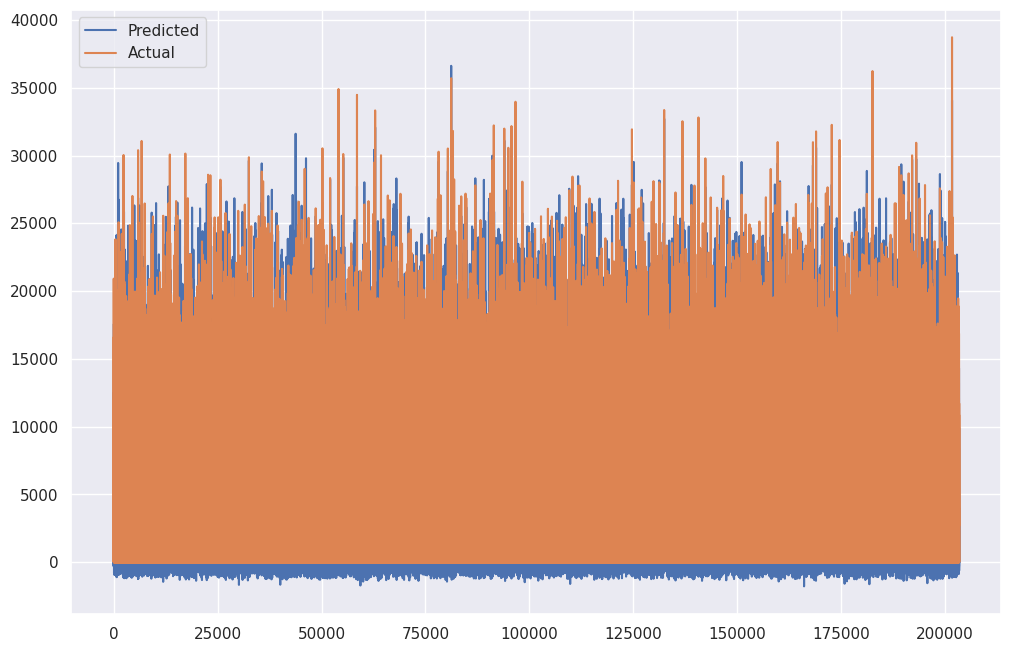

In [ ]:
# Plot 
plt.figure(figsize=(12,8))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

## RIDGE REGRESSION

In [ ]:
#import the packages
from sklearn.linear_model import Ridge
ridge= Ridge(alpha=0.01)
# Fitting the model
ridge.fit(X_train,y_train)
# check the score
ridge.score(X_train, y_train)

0.8671284549882655

In [ ]:
#Predict the X_train and X-test values
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [ ]:
# Checking the Performance on train set
r2_train_ridge = r2_score(y_train, y_pred_train_ridge)
print(r2_train_ridge)

0.8671284549882655


In [ ]:
# Checking the Performance on test set
r2_test_ridge = r2_score(y_test, y_pred_test_ridge)
print(r2_test_ridge)

0.8678908303083844


## Decision Tree

In [ ]:
from sklearn.metrics import accuracy_score, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# defining dependent variable
dep_var = 'Sales'

# defining independent variable
indep_var = dfr.columns.drop(['Year','Month','Day','Open','Sales'])

# Create the data of independent variables
X = dfr[indep_var]

# Create the dependent variable data
y = dfr[dep_var]

In [ ]:
# the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
# Transforming data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# DecisionTreeRefressor
Decision_tree = DecisionTreeRegressor()
Decision_tree_reg = Decision_tree.fit(X_train, y_train)

In [ ]:
#predict the X_train and X-test values
y_pred_train_d = Decision_tree.predict(X_train)
y_pred_test_d = Decision_tree.predict(X_test)

In [ ]:
# Checking the Performance on train set
r2_train_decision = r2_score(y_train, y_pred_train_d)
print(r2_train_decision)

0.9992568437786806


In [ ]:
# Checking the Performance on test set
r2_test_decision= r2_score(y_test, y_pred_test_d)
print(r2_test_decision)

0.9727453417588053


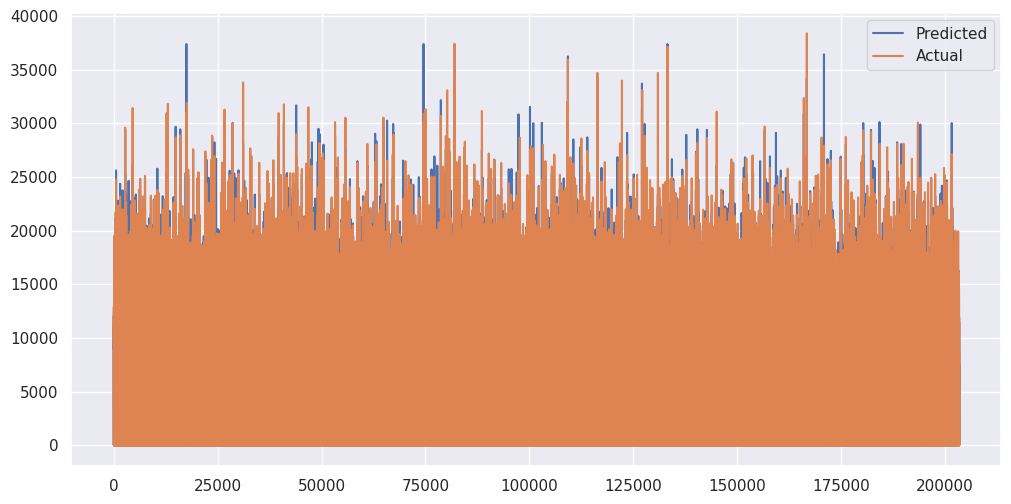

In [ ]:
#Plot
plt.figure(figsize=(12,6))
plt.plot(np.array(y_pred_test_d))
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

## Decision Tree With Hyper Parameter Tuning

In [ ]:
Decision_tree1= DecisionTreeRegressor(min_samples_leaf=8,min_samples_split=5)
Decision_tree_reg1 = Decision_tree1.fit(X_train, y_train)

In [ ]:
train_score = Decision_tree_reg1.score(X_train, y_train)
Test_Score = Decision_tree_reg1.score(X_test, y_test)
print(train_score)
print(Test_Score)

0.9869330241091193
0.9793130560640705


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix

In [ ]:
#I trained Model with hyper parameters..to not run everytime i record the result
#Here are our best parameters for Random Forest
#{ n_estimators=80,min_samples_split=2,min_samples_leaf=1,max_depth=None }

In [ ]:
# Create the RandomForestClassifier
#rf_model = RandomForestClassifier()
#rf_grid.fit(X_train,Y_train)

In [ ]:
#Random Forest with Parameters
rdf = RandomForestRegressor(n_estimators=80,min_samples_split=2, min_samples_leaf=1,max_depth=None,n_jobs=-1)
rdfreg = rdf.fit(X_train, y_train)

In [ ]:
# Making predictions on train and test data
y_pred_train_r = rdf.predict(X_train)
y_pred_test_r = rdf.predict(X_test)

In [ ]:
# Checking the Performance on train set
r2_train_random = r2_score(y_train, y_pred_train_r)
print(r2_train_random)

0.9971834800016324


In [ ]:
# Checking the Performance on test set
r2_test_random= r2_score(y_test, y_pred_test_r)
print(r2_test_random)

0.9834686451822243


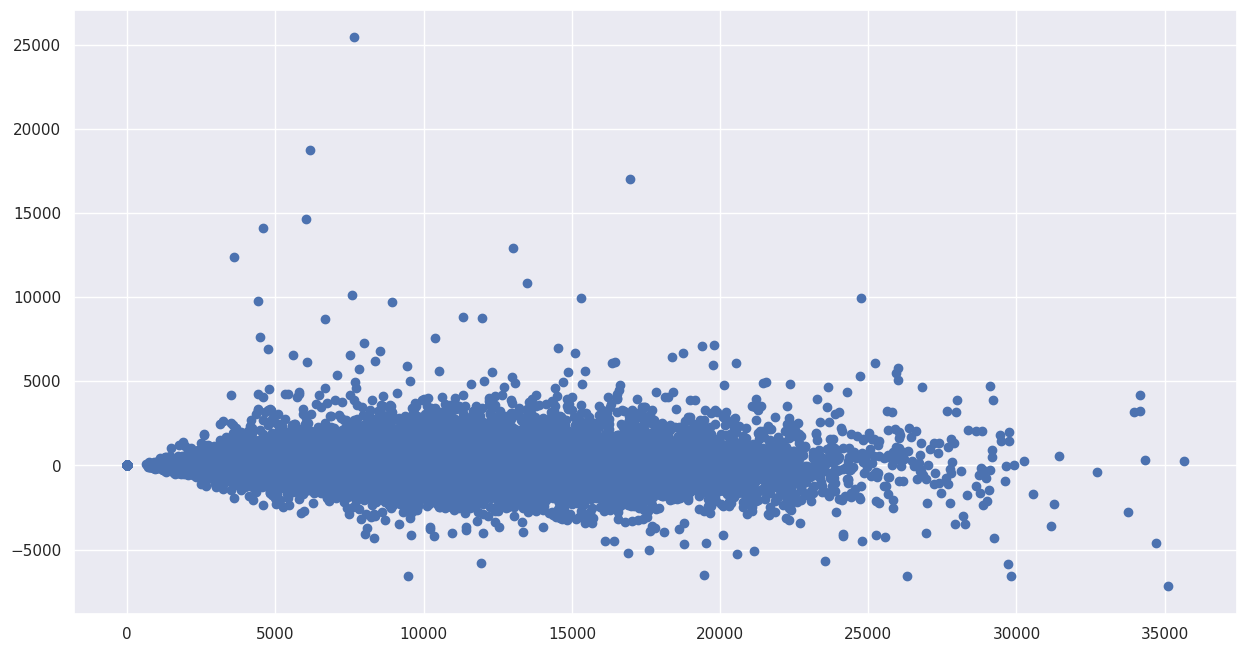

In [ ]:
# Heteroscadacity
plt.scatter((y_pred_test_r),(y_test)-(y_pred_test_r))
plt.show()

In [ ]:
dfr.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'Day', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c'],
      dtype='object')

In [ ]:
Score_dfr = pd.DataFrame({'Regressions':['LinearRegression','LassoRegression','RidgeRegresion', 'DecisionTreeRegressor', 'RandomForestRegressor'],'Train_Score':[r2_train, r2_train_lasso, r2_train_ridge,r2_train_decision, r2_train_random],'Test_Score':[r2_test,r2_test_lasso,r2_test_ridge, r2_test_decision, r2_test_random]})

In [ ]:
Score_dfr

,Regressions,Train_Score,Test_Score
0,LinearRegression,0.867129,0.867895
1,LassoRegression,0.866984,0.867702
2,RidgeRegresion,0.867128,0.867891
3,DecisionTreeRegressor,0.999257,0.972745
4,RandomForestRegressor,0.997183,0.983469


# 2.Train-Test Split (Time Base Split)

## Why we select  Time Base Split over random Split?
1. As we have to predict data of last 6 weeks means we have train on data before the 6 weeks
2. In such case random split will leads to data leakage
3. So we go with time base split for our best model.

In [ ]:
# date as index
df.set_index(['Date'],inplace=True)
# sorting
df.sort_index(inplace=True)
# chekc
df.head(2)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,StateHoliday_a,StateHoliday_b,StateHoliday_c
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1115,2,0,0,0,0,1,4,1,5350.0,...,1,22.0,2012.0,3,2013,1,1,1,0,0
2013-01-01,379,2,0,0,0,0,1,4,0,6630.0,...,0,0.0,0.0,0,2013,1,1,1,0,0


In [ ]:
train_data=df.loc[:pd.to_datetime("2015-06-14")]
test_data=df.loc[pd.to_datetime("2015-06-15"):]

In [ ]:
# Create the data of independent variables
X_train=train_data[list(set(df.columns)-{"Sales","Date"})]
# Create a list of independent variables
y_train=train_data["Sales"]

In [ ]:
X_test=test_data[list(set(df.columns)-{"Sales","Date"})]
y_test=test_data["Sales"]

In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## LINEAR REGRESSION

In [ ]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Checking the score on train set.
regressor.score(X_train, y_train)

0.8687939558468463

In [ ]:
#checking the coefficeint
regressor.coef_

array([-4.29159237e+02,  1.30358784e+03, -9.58780202e+02,  8.94211813e+04,
        7.48430326e+02,  2.02236631e+03, -1.36817765e+02, -4.42119349e+02,
       -7.65204667e+02, -1.59217458e+00, -2.97594078e+01,  4.39171331e+01,
        6.47049955e+01, -3.30101461e+02,  2.92804261e+02, -8.93713858e+04,
        3.79824177e+02,  1.23389217e+03,  4.11242074e+02,  1.27620714e+02,
        4.68269353e+04])

In [ ]:
#check the intercept
regressor.intercept_

-422.0243098964547

In [ ]:
# Predicting the Test set results
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

In [ ]:
from numpy import math
math.sqrt(mean_squared_error(y_test, y_pred_test))

1515.9389281686001

In [ ]:
# Checking the Performance on train set
r2_train= r2_score(y_train, y_pred_train)
print(r2_train)

0.8687939558468463


In [ ]:
# Checking the Performance on test set
r2_test= r2_score(y_test, y_pred_test)
print(r2_test)

0.8350772279925889


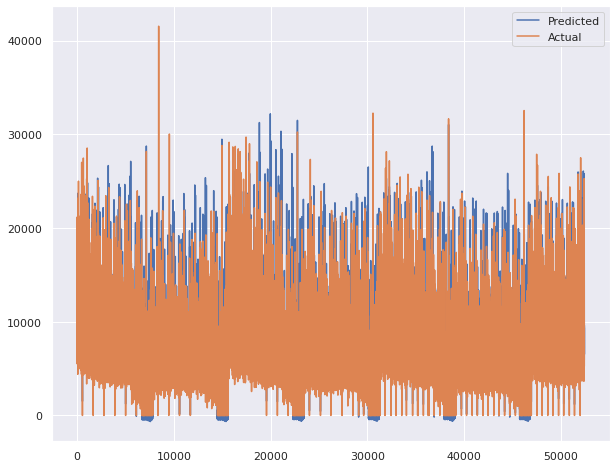

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

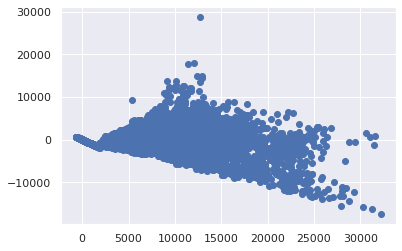

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))
plt.show()

## LASSO REGRESSION

In [ ]:
# Createing an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.0001, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.8351369063036629 0.8686269194614423


In [ ]:
# Predicting the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [ ]:
# Checking the Performance on train set
r2_train_lasso= r2_score(y_train, y_pred_train_lasso)
print(r2_train_lasso)

0.8686269194614423


In [ ]:
# Checking the Performance on test set
r2_test_lasso= r2_score(y_test, y_pred_test_lasso)
print(r2_test_lasso)

0.8351369063036629


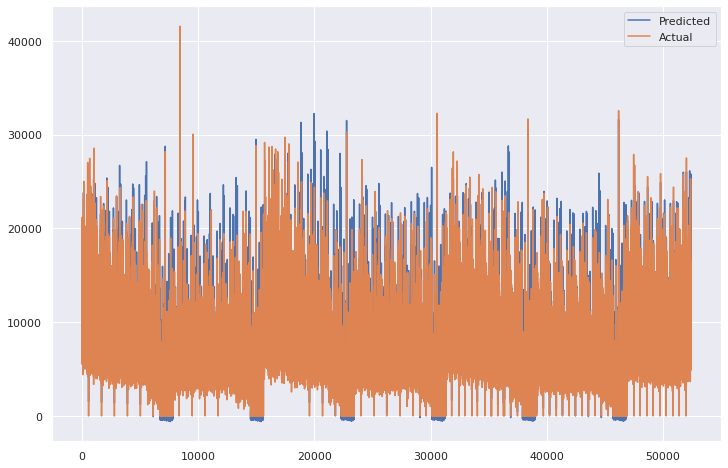

In [ ]:
# Plot 
plt.figure(figsize=(12,8))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

## RIDGE REGRESSION

In [ ]:
#import the packages
from sklearn.linear_model import Ridge
ridge= Ridge(alpha=0.01)
# Fitting the model
ridge.fit(X_train,y_train)
# check the score
ridge.score(X_train, y_train)

0.8687933046432074

In [ ]:
#Predict the X_train and X-test values
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [ ]:
# Checking the Performance on train set
r2_train_ridge = r2_score(y_train, y_pred_train_ridge)
print(r2_train_ridge)

0.8687933046432074


In [ ]:
# Checking the Performance on test set
r2_test_ridge = r2_score(y_test, y_pred_test_ridge)
print(r2_test_ridge)

0.8350920674476752


## Decision Tree

In [ ]:
from sklearn.metrics import accuracy_score, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# defining dependent variable
dep_var = 'Sales'

# defining independent variable
indep_var = df.columns.drop(['Year','Month','Day','Open','Sales'])

# Create the data of independent variables
X = df[indep_var]

# Create the dependent variable data
y = df[dep_var]

In [ ]:
# the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
# Transforming data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# DecisionTreeRefressor
Decision_tree = DecisionTreeRegressor()
Decision_tree_reg = Decision_tree.fit(X_train, y_train)

In [ ]:
#predict the X_train and X-test values
y_pred_train_d = Decision_tree.predict(X_train)
y_pred_test_d = Decision_tree.predict(X_test)

In [ ]:
# Checking the Performance on train set
r2_train_decision = r2_score(y_train, y_pred_train_d)
print(r2_train_decision)

0.9992537336685258


In [ ]:
# Checking the Performance on test set
r2_test_decision= r2_score(y_test, y_pred_test_d)
print(r2_test_decision)

0.9724052744218553


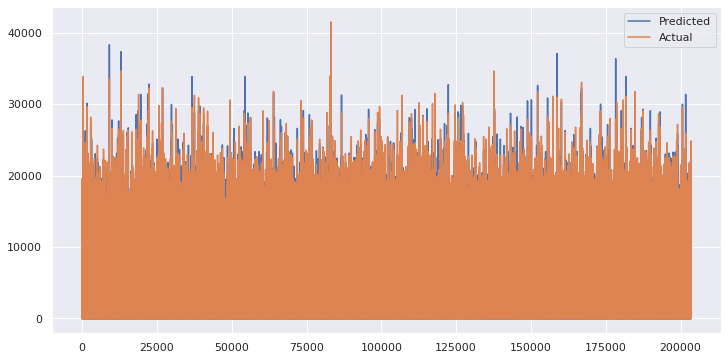

In [ ]:
#Plot
plt.figure(figsize=(12,6))
plt.plot(np.array(y_pred_test_d))
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

## Decision Tree With Hyper Parameter Tuning

In [ ]:
Decision_tree1= DecisionTreeRegressor(min_samples_leaf=8,min_samples_split=5)
Decision_tree_reg1 = Decision_tree1.fit(X_train, y_train)

In [ ]:
train_score = Decision_tree_reg1.score(X_train, y_train)
Test_Score = Decision_tree_reg1.score(X_test, y_test)
print(train_score)
print(Test_Score)

0.9869488890702994
0.9786422949310681


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix

In [ ]:
#I trained Model with hyper parameters..to not run everytime i record the result
#Here are our best parameters for Random Forest
#{ n_estimators=80,min_samples_split=2,min_samples_leaf=1,max_depth=None }

In [ ]:
# Create the RandomForestClassifier
#rf_model = RandomForestClassifier()
#rf_grid.fit(X_train,Y_train)

In [ ]:
#Random Forest with Parameters
rdf = RandomForestRegressor(n_estimators=80,min_samples_split=2, min_samples_leaf=1,max_depth=None,n_jobs=-1)
rdfreg = rdf.fit(X_train, y_train)

In [ ]:
# Making predictions on train and test data
y_pred_train_r = rdf.predict(X_train)
y_pred_test_r = rdf.predict(X_test)

In [ ]:
# Checking the Performance on train set
r2_train_random = r2_score(y_train, y_pred_train_r)
print(r2_train_random)

0.997198914325366


In [ ]:
# Checking the Performance on test set
r2_test_random= r2_score(y_test, y_pred_test_r)
print(r2_test_random)

0.9831225246068382


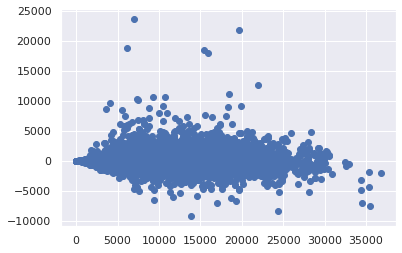

In [ ]:
# Heteroscadacity
plt.scatter((y_pred_test_r),(y_test)-(y_pred_test_r))
plt.show()

In [ ]:
df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'Day', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c'],
      dtype='object')

## <font color='red'>Score on last 6 week test data</font>

In [ ]:
Score_df = pd.DataFrame({'Regressions':['LinearRegression','LassoRegression','RidgeRegresion', 'DecisionTreeRegressor', 'RandomForestRegressor'],'Train_Score':[r2_train, r2_train_lasso, r2_train_ridge,r2_train_decision, r2_train_random],'Test_Score':[r2_test,r2_test_lasso,r2_test_ridge, r2_test_decision, r2_test_random]})

In [ ]:
Score_df

,Regressions,Train_Score,Test_Score
0,LinearRegression,0.868794,0.835077
1,LassoRegression,0.868627,0.835137
2,RidgeRegresion,0.868793,0.835092
3,DecisionTreeRegressor,0.999254,0.972405
4,RandomForestRegressor,0.997199,0.983123


# Observation

1. From plot sales and competition Open Since Month shows sales go increasing from November and highest in month December.
2. From plot Sales and day of week, Sales highest on Monday and start declining from Tuesday to Saturday and on Sunday Sales almost near to Zero.
3. Plot between Promotion and Sales shows that promotion helps in increasing Sales.
4. Type of Store plays an important role in opening pattern of stores.
5. All Type ‘b’ stores never closed except for refurbishment or other reason.
6. All Type ‘b’ stores have comparatively higher sales and it mostly constant with peaks appears on weekends.
7. ssortment Level ‘b’ is only offered at Store Type ‘b’.
8. We can observe that most of the stores remain closed during State Holidays. But it is interesting to note that the number of stores opened during School Holidays were more than that were opened during State Holidays.

# Conclusion

### 1. Rossmann Stores Data.csv dataset has 10,107,219 rows and 10 columns. store.csv dataset has 1115 rows and 9 columns. 
### 2. The sales in the month of December is the highest sales among others. 
### 3. The Promotion increases the sales so we should focus on that factor
### 4. As the customers are positively correlated with sales so we have to increase the frequecy of customers by offers 
### 5. The sales for store type B is higher than any other stores

## CONCLUSION
In our analysis, we initially did EDA on all the features of our datset. We first analysed our dependent variable, 'Sales' and also transformed it. Next we analysed categorical variable and replaced null values, we also analysed numerical variable, found out the correlation, distribution and their relationship with the dependent variable using corr() Function. We also removed some numerical features who had mostly 0 values and hot encoded the categorical variables.We split the data into train which exclude last 6 weeks data and test which contain last 6 weeks data.

Next we implemented six machine learning algorithms Linear Regression, lasso,ridge, decission tree, Random Forest. We did hyperparameter tuning into improve our model performance.

1. The sales in the month of December is the highest sales among others.
2. The Sales is highest on Monday and start declining from Tuesday to Saturday and on Sunday Sales almost near to Zero.
3. Those Stores who takes participate in Promotion got their Sales increased.
4. Type of Store plays an important role in opening pattern of stores. All Type ‘b’ stores never closed except for refurbishment or other reason.
5. We can observe that most of the stores remain closed during State holidays. But it is interesting to note that the number of stores opened during School Holidays were more than that were opened during State Holidays.
6. The R Squared score of all Liner Regression Algorithm with or without Regularization are quit good which is 0.86.
7. the R Squared score of the Decision Tree Regressor model we got 0.97 on test set which is also good.
8. The Random Forest regressor model performed 0.98 which is very well amoung the others.
10. We can say that random forest regressor model is our optimal model and can be deploy.